## Importing the necessary libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### importing the dataset

In [2]:
df=pd.read_csv("C:/Users/USER/Downloads/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#checking the number of rows and columns
df.shape

(5110, 12)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Running EDD on the data

In [7]:
## removing unwanted column id because we don't need it 
df.drop("id", inplace=True, axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


From the above, we can see that there are missing values in the bmi variable, since the total count of it isn't up to 5110. 
There are significant differences between the min and max values of the age, avg_glucose_level and the bmi.
You can also see that there s a large difference between the 75% and the max of the bmi variable, which means that the data for the bmi is negatively skewed or there may be outliers
there's also a somewhat large difference between the 75% of the avg_glucose_level and the max, which means there may be outliers


In [9]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

## checking for missing values

In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
## using the mean to fill up the empty values
df['bmi'].fillna(df['bmi'].mean(), inplace = True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
### checking the summary for the categorical columns
df.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [14]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [15]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [18]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [19]:
## dropping the unusual category in smoking_status
df.drop(df.loc[df['smoking_status']=='unknown'].index, inplace=True)


For the above, we used  a lowercase letter 'u' for the unknown instead of an uppercase 'U' so it didn't work but we redid it in another notebook and it seems to have affected our predictions by reducing the accuracy score

In [20]:
df.shape

(5110, 11)

In [21]:
#index reset
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [22]:
## creating a variable containing our categorical variables
catvab = df.select_dtypes('object')
catvab.describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## Visualizations

<AxesSubplot:xlabel='gender', ylabel='count'>

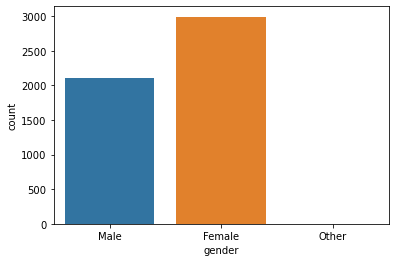

In [23]:
sns.countplot(x='gender', data = df)

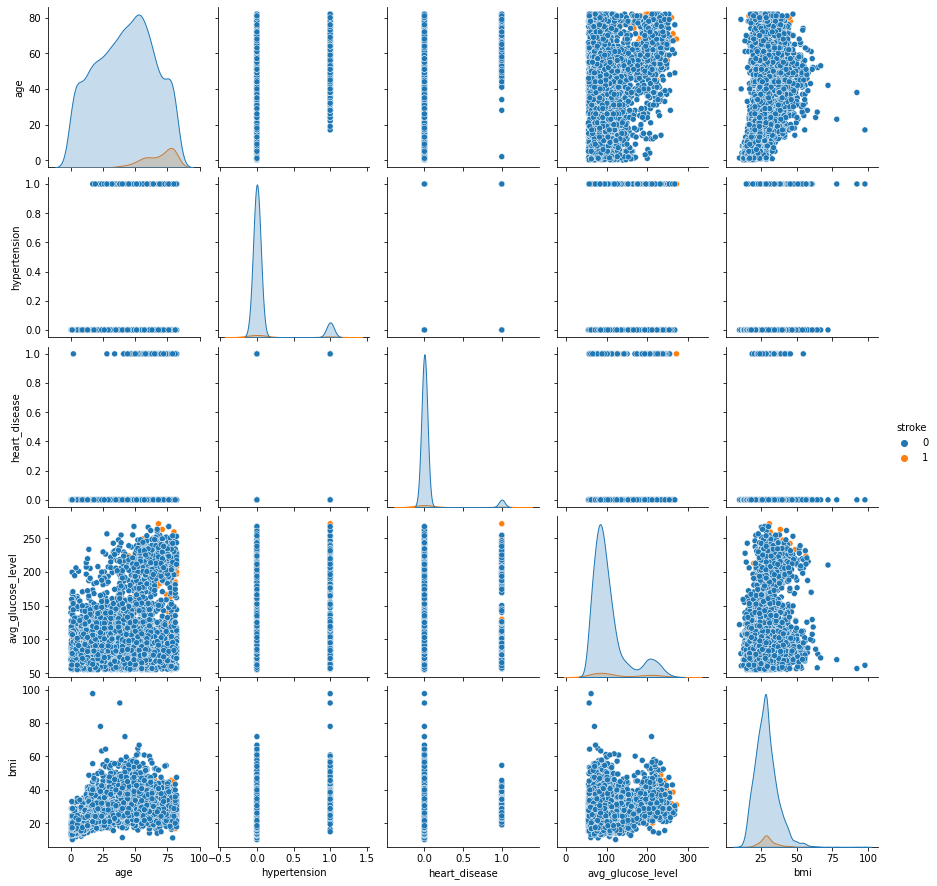

In [24]:
#checking the relationship between variables using pairplot
sns.pairplot(df,diag_kind="kde", hue="stroke")

Observation:
    We can see that the dataset is imbalanced from the pairplot above. We will balance it a few steps below.

In [25]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


## Getting dummie values for our categorical variables

In [26]:
df1 = pd.get_dummies(df)

In [27]:
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [28]:
del df1['gender_Female']

In [29]:
del df1['gender_Other']

In [30]:
del df1['ever_married_No']

In [31]:
del df1['work_type_children']

In [32]:
del df1['Residence_type_Rural']

In [33]:
del df1['smoking_status_Unknown']

In [34]:
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,0,1,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,0,1,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,0,1,0,0,1,0


•	The number of dummy variables necessary to represent a single attribute variable is equal to the number of levels (categories) in that variables minus 1.
So in this new dummy variables, we had;
1. Gender_Male and Gender_Female so we removed the gender_Female
2. ever_married_Yes and ever_married_No so we removed the ever_married_No
3. work_type_Govt_job, work_type_Never_worked, work_type_Private, work_type_Self_employed so we removed work_type_children
4. residence_type_Urban and residence_type_Rural so we removed residence_type_Rural
5. smoking_status_formerlysmoked, smoking_status_never smoked, smoking_status-smokes and smoking_status_Unknown so we removed smoking_status_unknown

## Wanting to know how some variables lead to stroke

## 1. does gender lead to stroke

<AxesSubplot:xlabel='gender_Male', ylabel='stroke'>

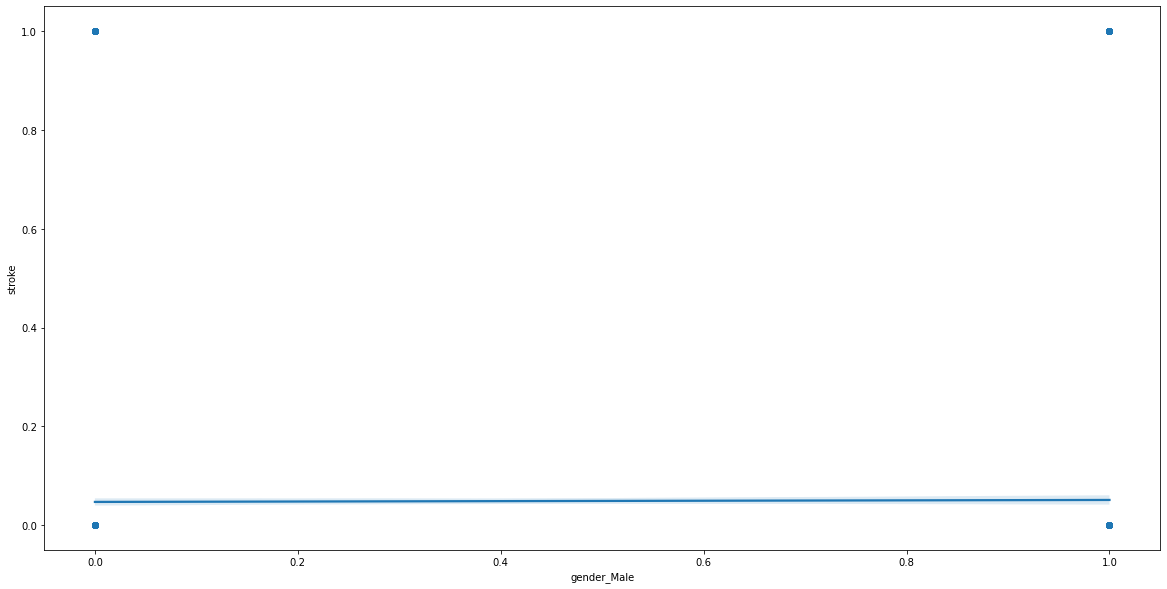

In [35]:
plt.figure(figsize=(20,10))
sns.regplot(x = "gender_Male", y = "stroke", data = df1)

The regression plot gives a striaght line indicating that no particular gender has more chances of stroke than other. Thus probablity of stroke is same for all genders

## 2. Does age lead to stroke

<AxesSubplot:xlabel='stroke', ylabel='age'>

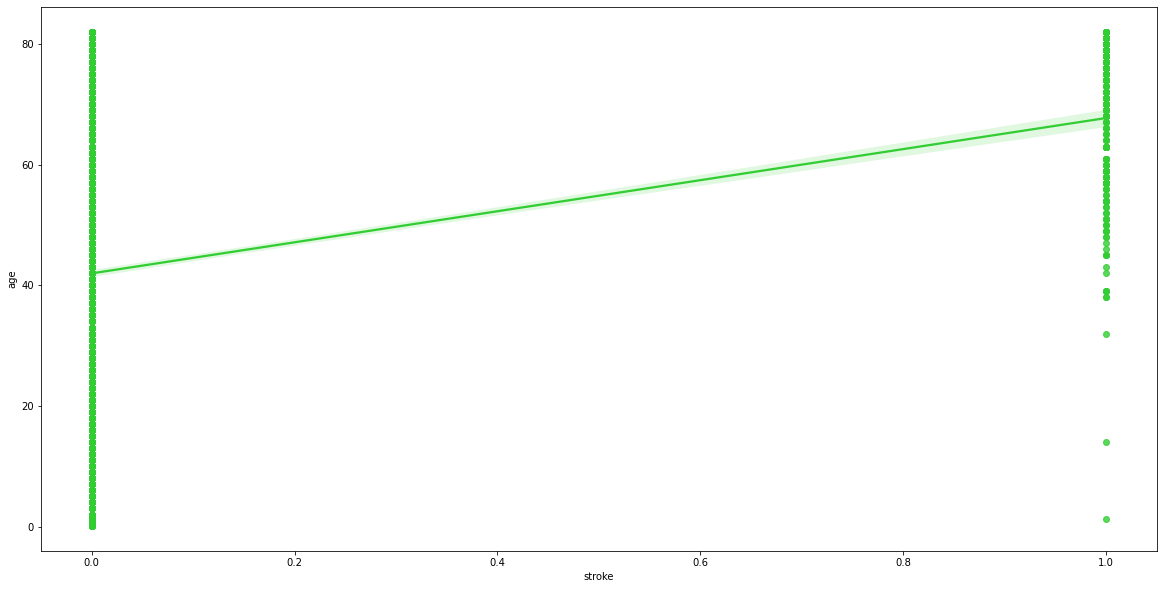

In [36]:
plt.figure(figsize = (20,10))
sns.regplot(y = df1['age'],x = df['stroke'],color = 'limegreen')

Here you can see that as age increases, the chances of having stroke

## 2. Does hypertension lead to stroke

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

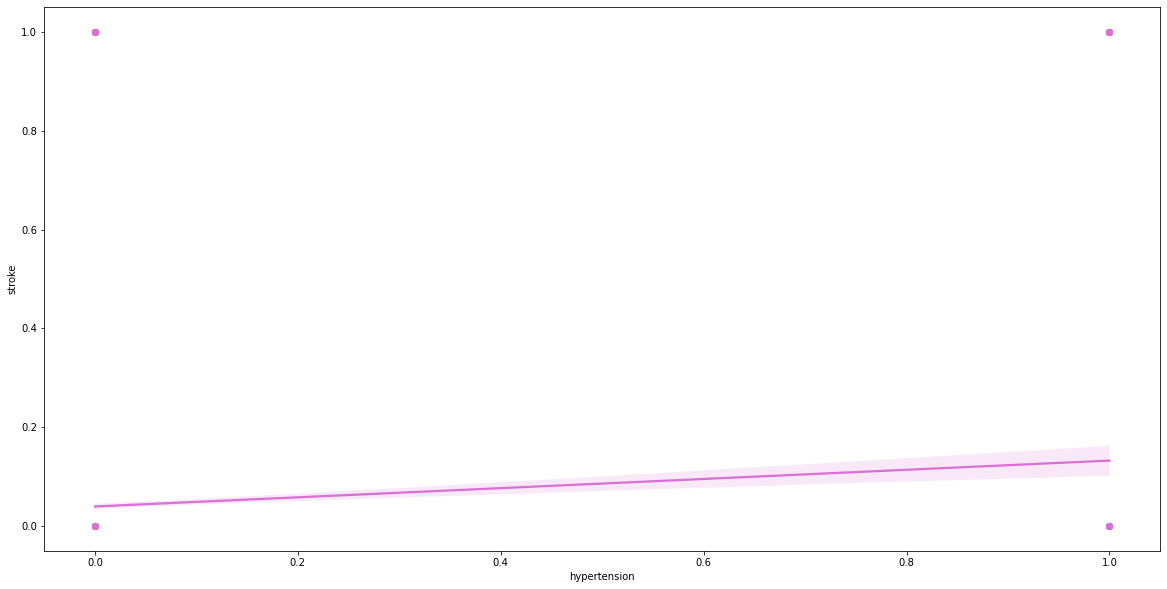

In [37]:
plt.figure(figsize = (20,10))
sns.regplot(x = df1['hypertension'],y = df1['stroke'],color = 'orchid')

Having hypertension increases the chances of having stroke

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


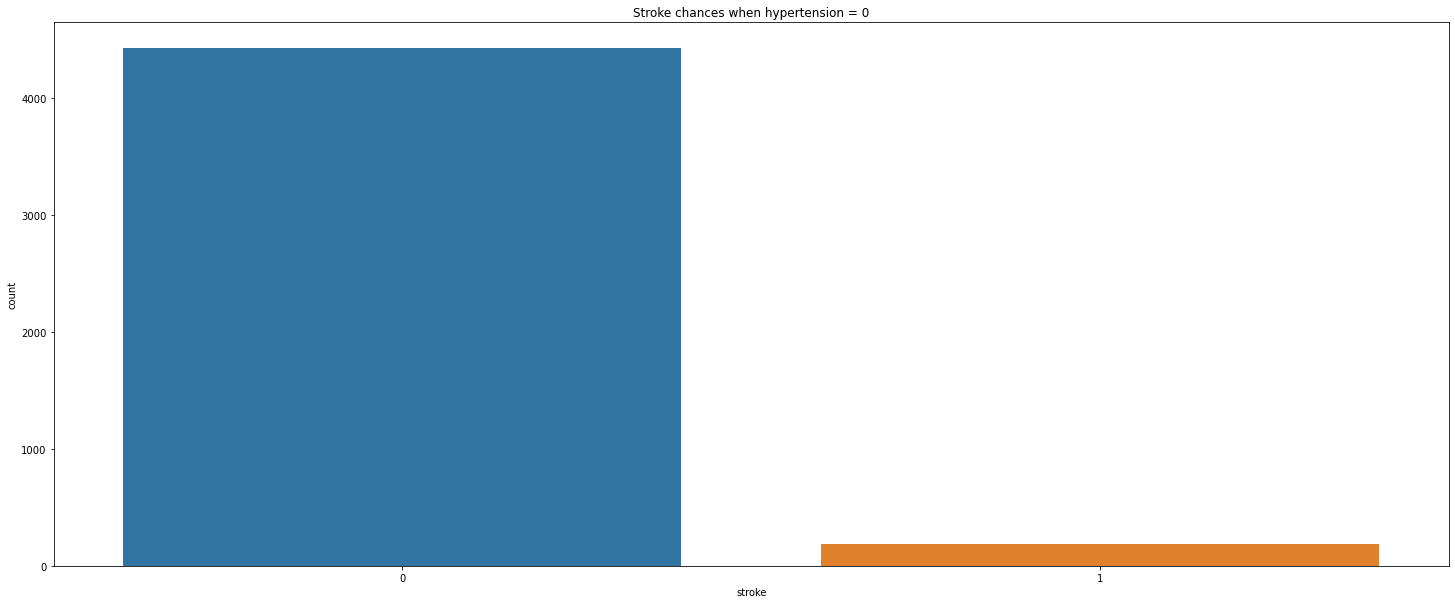

In [38]:
### Stroke chances when hypertension is 0
df_hypertension_0 = df1[df1['hypertension']==0]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_hypertension_0);
plt.title("Stroke chances when hypertension = 0");

Observation:
    There is 3.96% chance of having stroke when an individual doesn't have hypertension

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


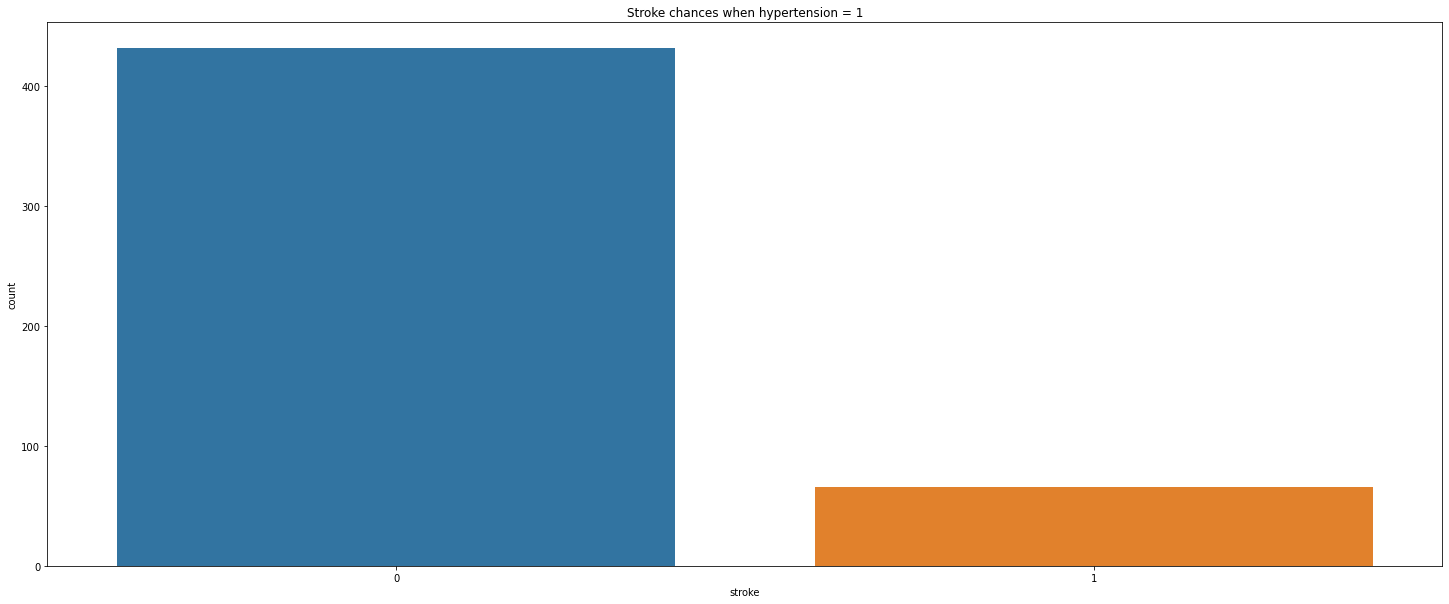

In [39]:
### Stroke chances when hypertension is 1
df_hypertension_1 = df1[df1['hypertension']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_hypertension_1);
plt.title("Stroke chances when hypertension = 1");

Observation: 
    There is 13.25% of having stroke  when you have hypertension

## 3. Does heart disease lead to stroke

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

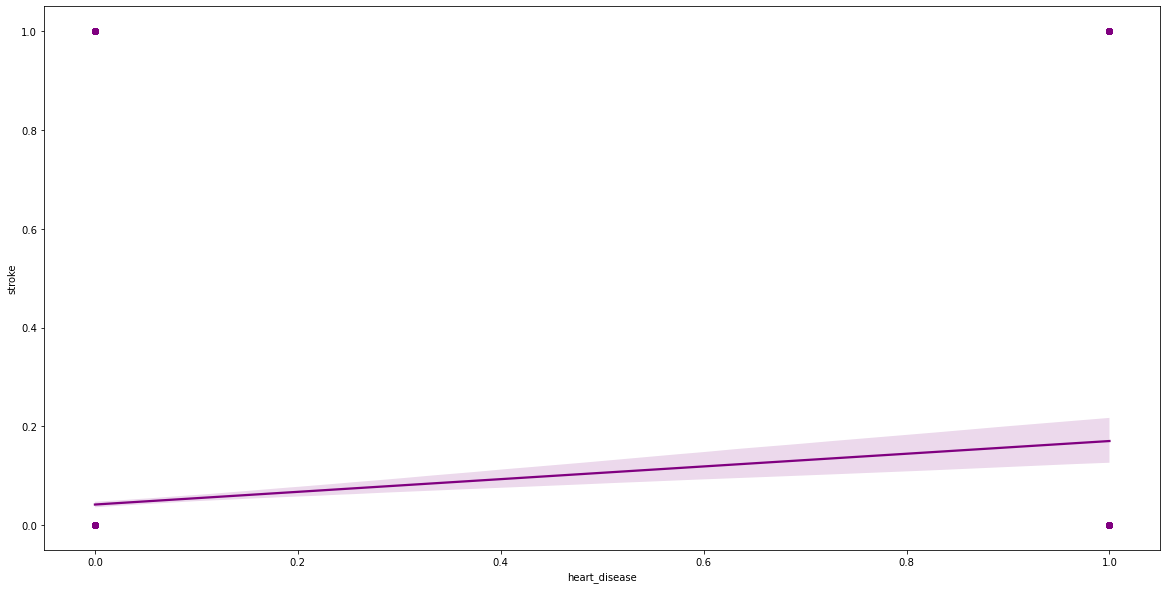

In [40]:
plt.figure(figsize = (20,10))
sns.regplot(x = df1['heart_disease'],y = df1['stroke'],color = 'purple')

Having heart diesease increases the chances of getting stroke

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


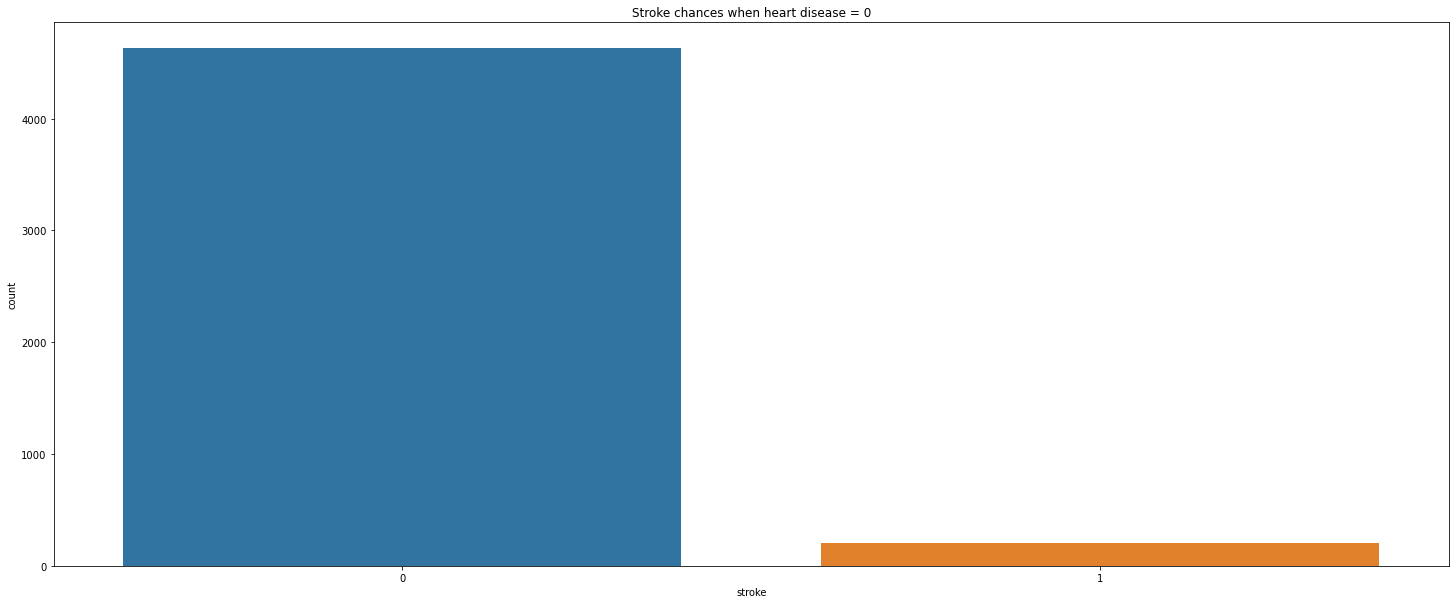

In [41]:
df_heart_disease_0 = df1[df1['heart_disease']==0]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_heart_disease_0);
plt.title("Stroke chances when heart disease = 0");

There's about 4% chances of having stroke if one doesn't have heart disease

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


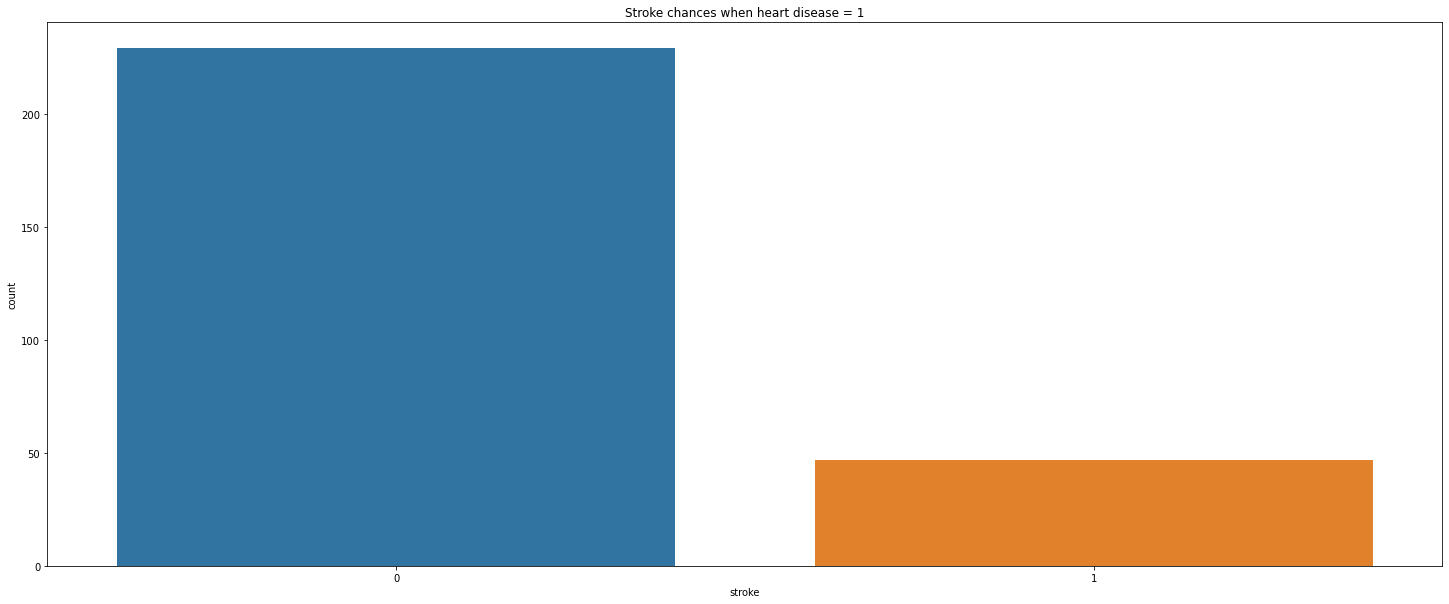

In [42]:
df_heart_disease_1 = df1[df1['heart_disease']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_heart_disease_1);
plt.title("Stroke chances when heart disease = 1");

There's 17% chances of having stroke if one has heart disease

## 4. Does marriage influence stroke

<AxesSubplot:xlabel='ever_married_Yes', ylabel='stroke'>

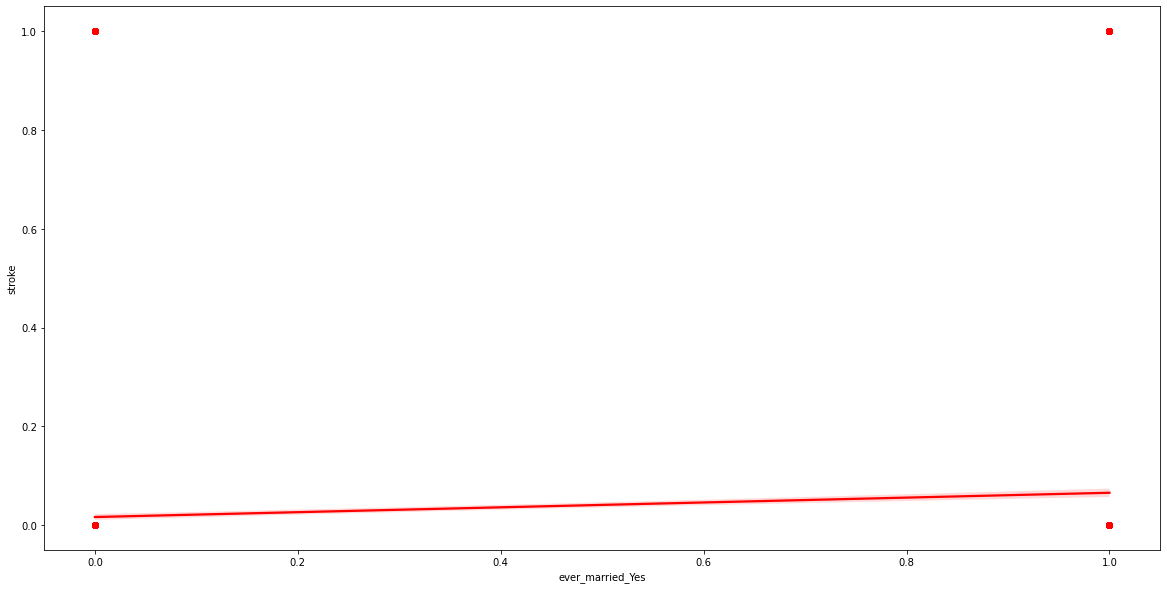

In [43]:
plt.figure(figsize = (20,10))
sns.regplot(x = df1['ever_married_Yes'],y = df1['stroke'],color = 'red')

Observation: It doesn't really influence the chances of having stroke

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


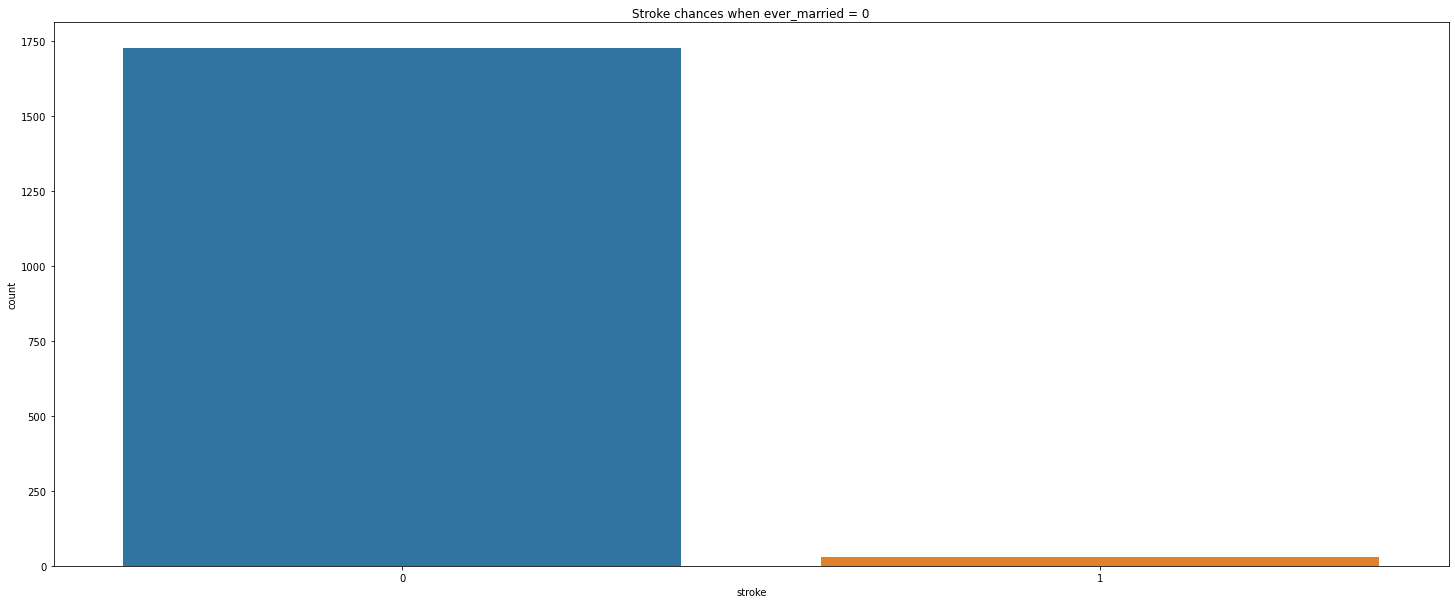

In [44]:
df_ever_maried_0 = df1[df1['ever_married_Yes']==0]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_ever_maried_0);
plt.title("Stroke chances when ever_married = 0");

Observation: There is just 1.7% chance of getting stroke when an individual is not married

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


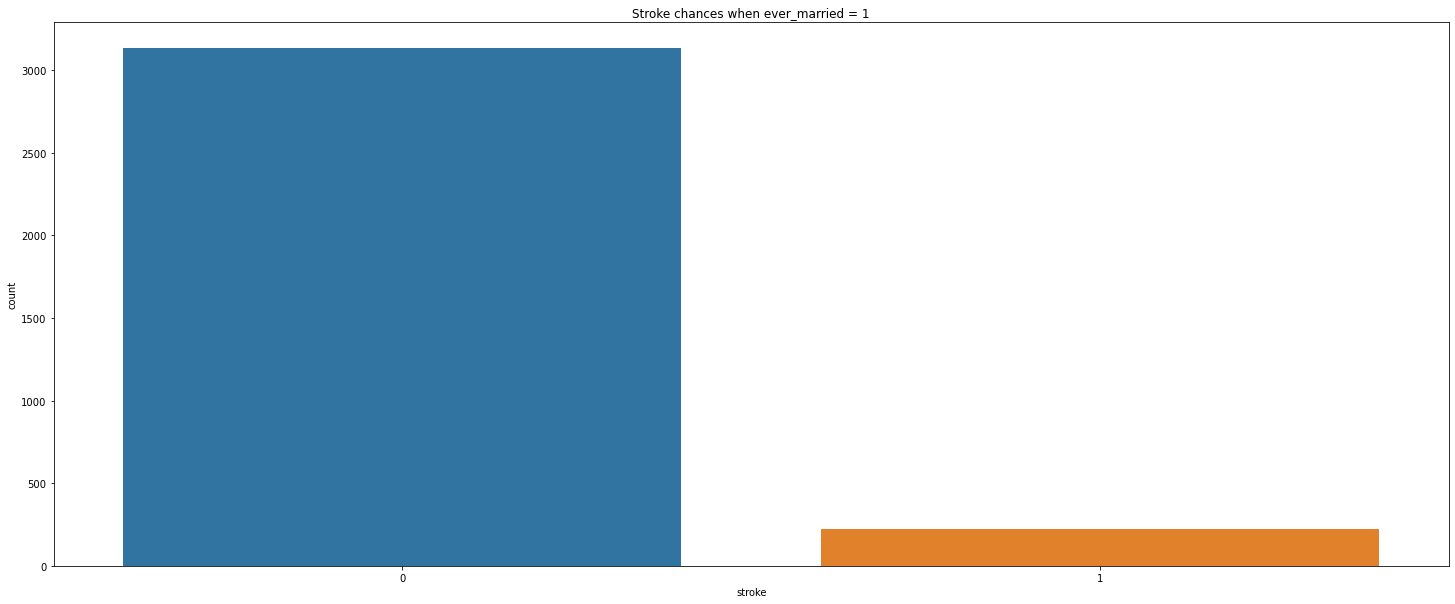

In [45]:
df_ever_maried_1 = df1[df1['ever_married_Yes']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_ever_maried_1);
plt.title("Stroke chances when ever_married = 1");

Observation: There is 7% chance of having stroke if an individual is married

## 5. Does work type lead to stroke

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


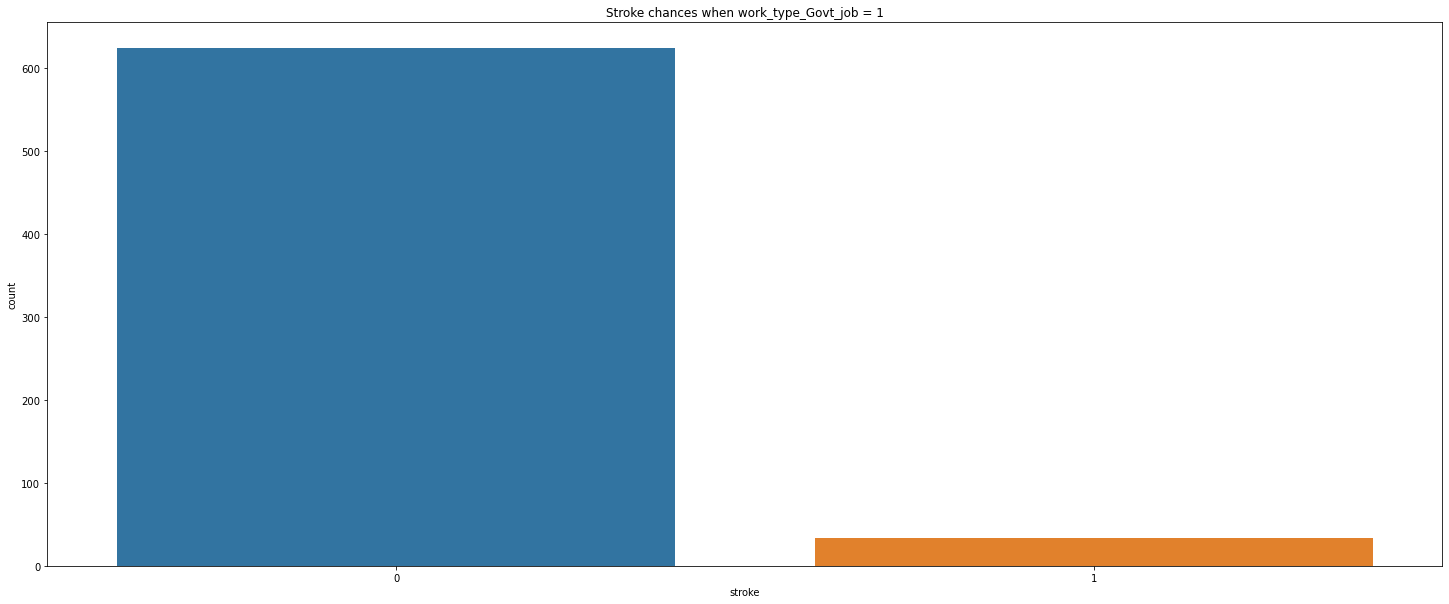

In [46]:
df_work_type_Govt_job_1 = df1[df1['work_type_Govt_job']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_work_type_Govt_job_1);
plt.title("Stroke chances when work_type_Govt_job = 1");

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


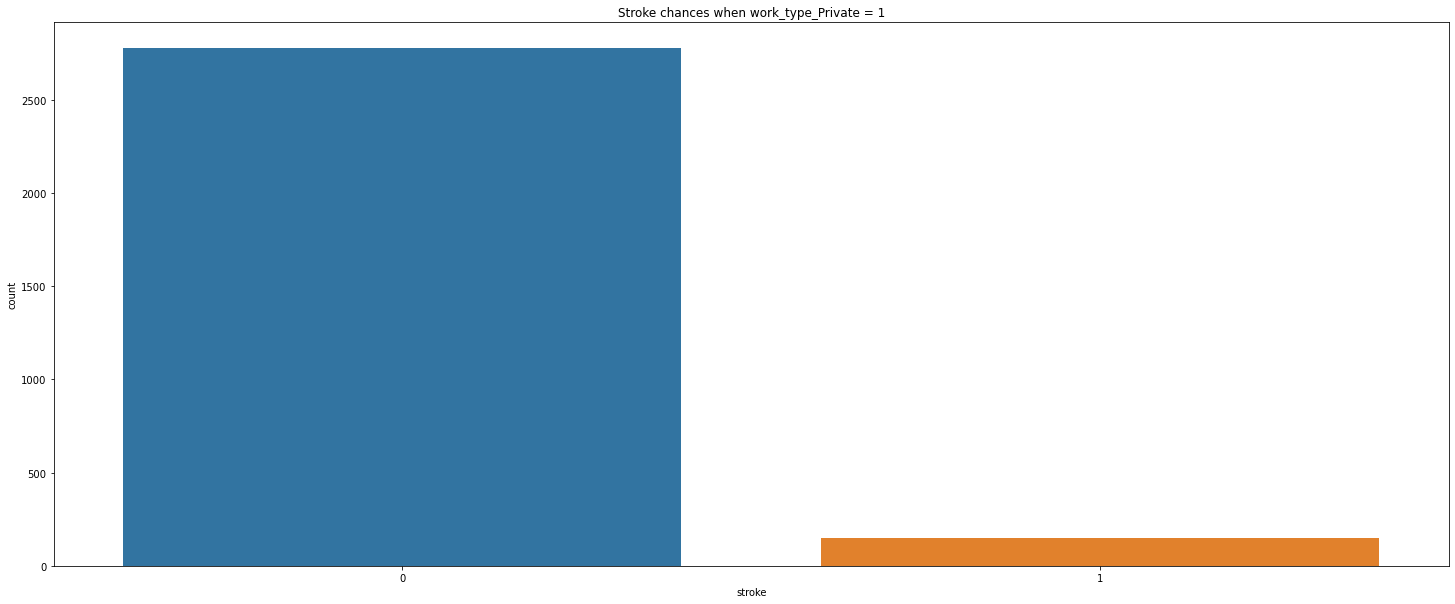

In [47]:
df_work_type_Private_1 = df1[df1['work_type_Private']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_work_type_Private_1);
plt.title("Stroke chances when work_type_Private = 1");

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


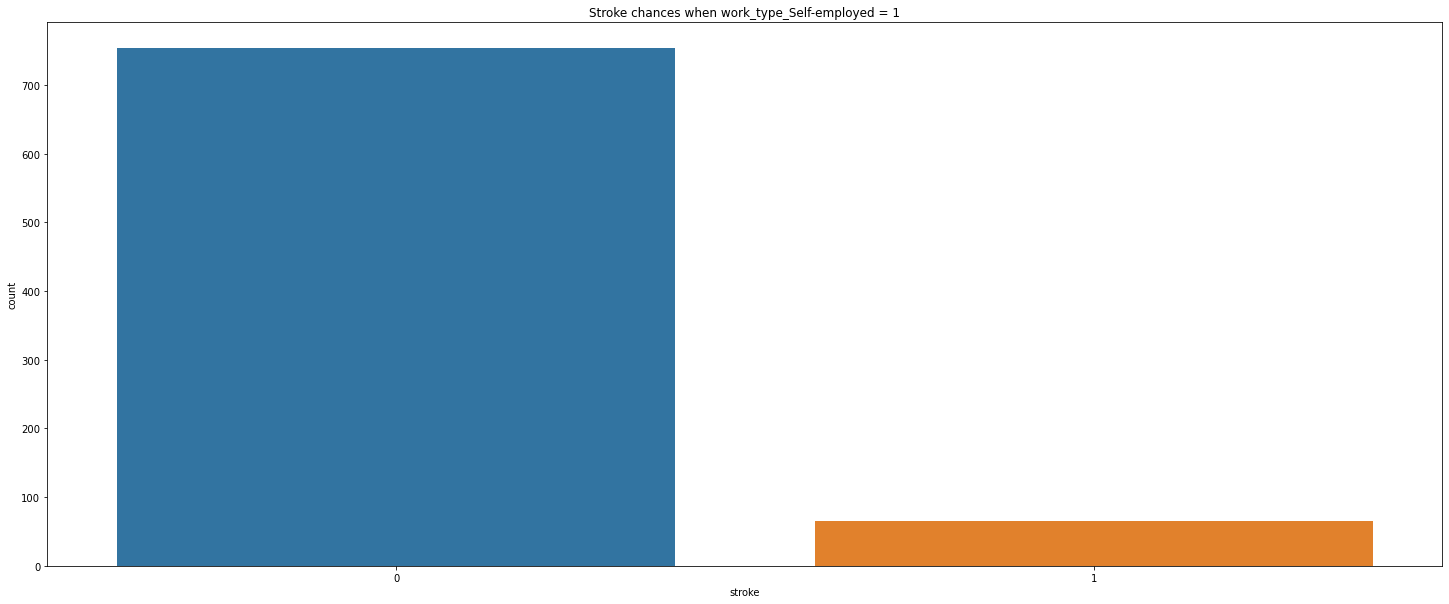

In [48]:
df_work_type_Self_employed_1 = df1[df1['work_type_Self-employed']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_work_type_Self_employed_1);
plt.title("Stroke chances when work_type_Self-employed = 1");

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


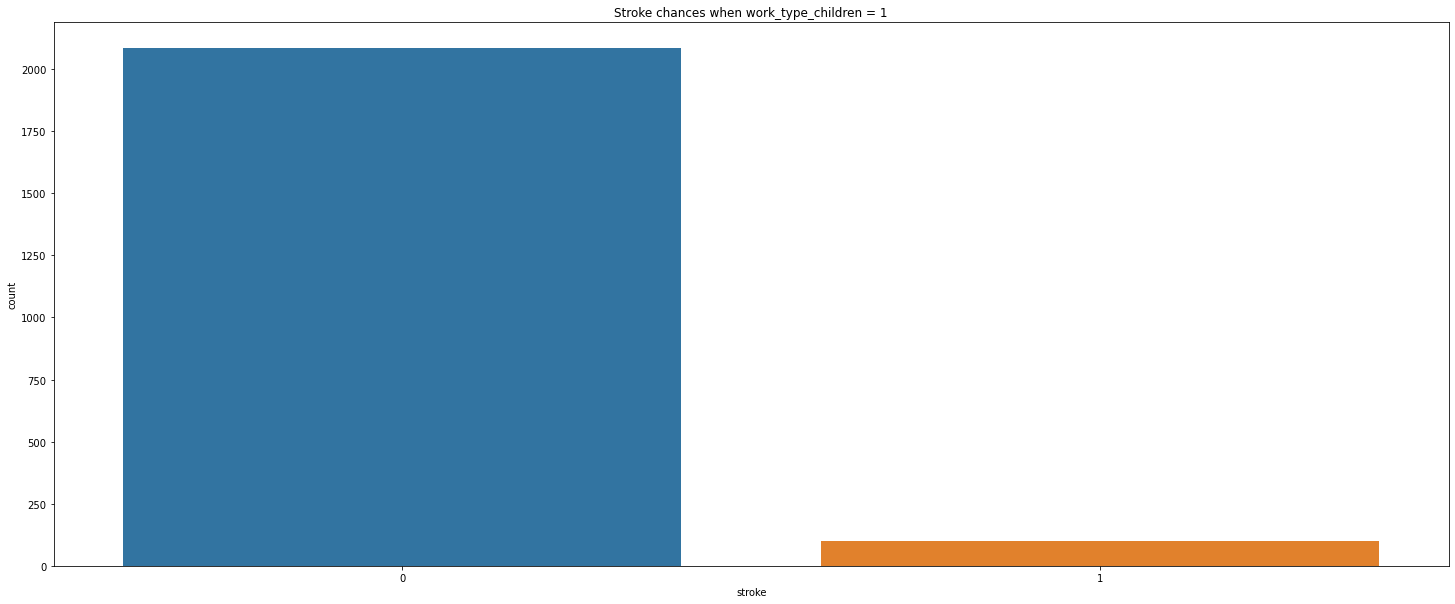

In [49]:
df_work_type_children_1 = df1[df1['work_type_Private']==0]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_work_type_children_1);
plt.title("Stroke chances when work_type_children = 1");

This is the chances of getting stroke when one works for children

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


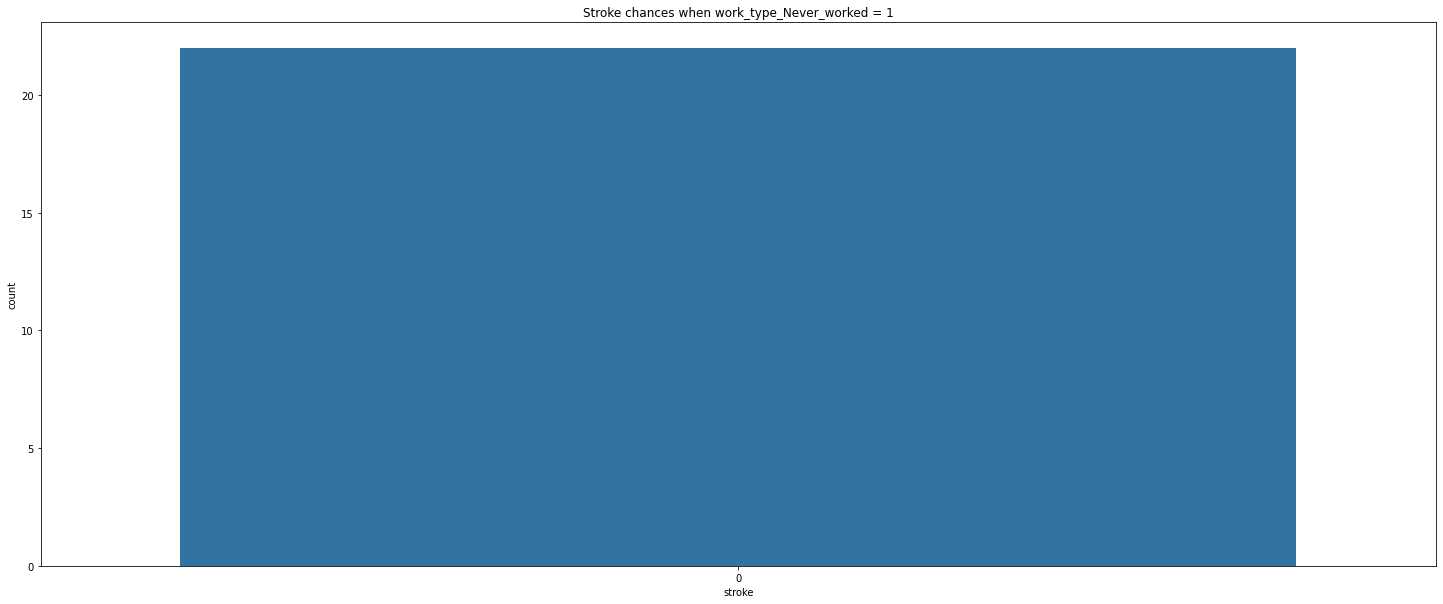

In [50]:
df_work_type_Never_worked_1 = df1[df1['work_type_Never_worked']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_work_type_Never_worked_1);
plt.title("Stroke chances when work_type_Never_worked = 1");

Observation: Those who never worked didn't get stroke (0%)

<AxesSubplot:xlabel='work_type_Govt_job', ylabel='stroke'>

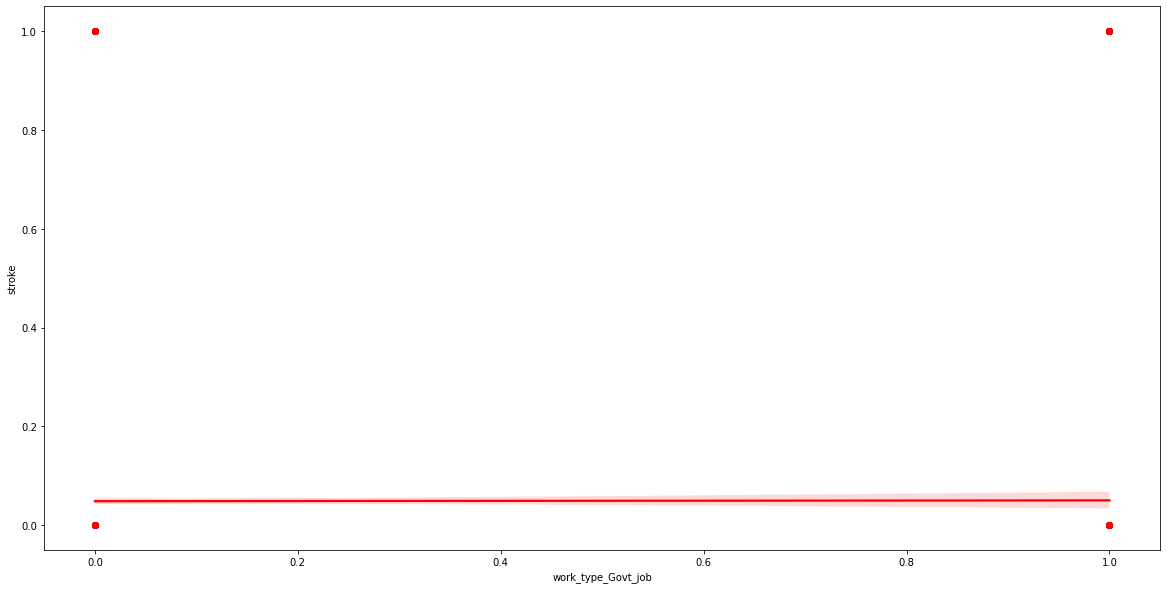

In [51]:
plt.figure(figsize = (20,10))
sns.regplot(x = df1['work_type_Govt_job'],y = df1['stroke'],color = 'red')

<AxesSubplot:xlabel='work_type_Private', ylabel='stroke'>

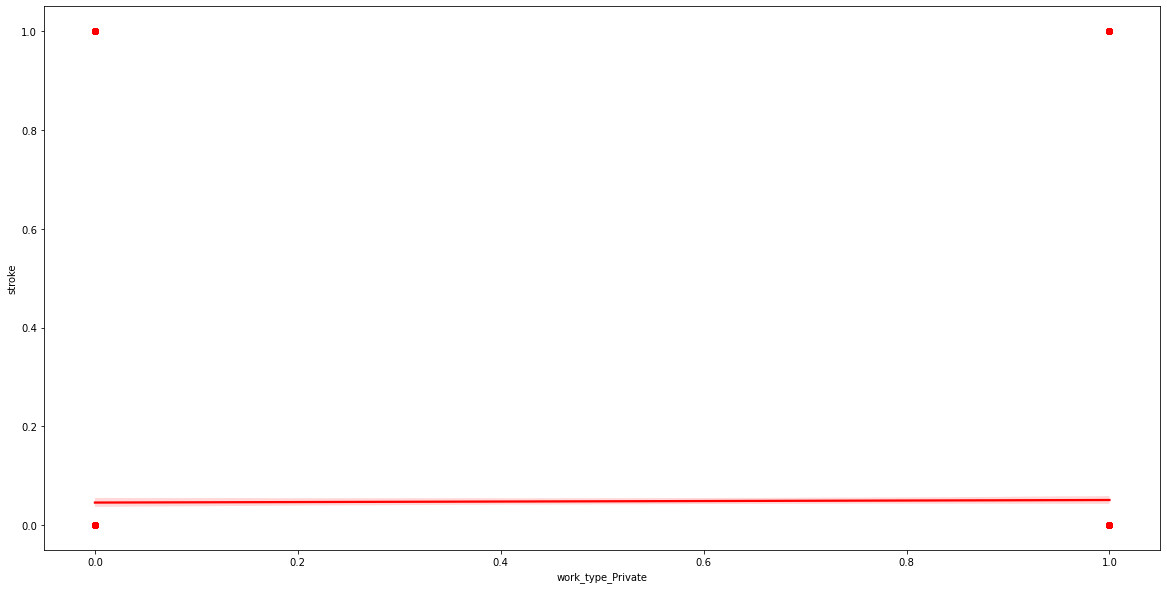

In [52]:
plt.figure(figsize = (20,10))
sns.regplot(x = df1['work_type_Private'],y = df1['stroke'],color = 'red')

<AxesSubplot:xlabel='work_type_Self-employed', ylabel='stroke'>

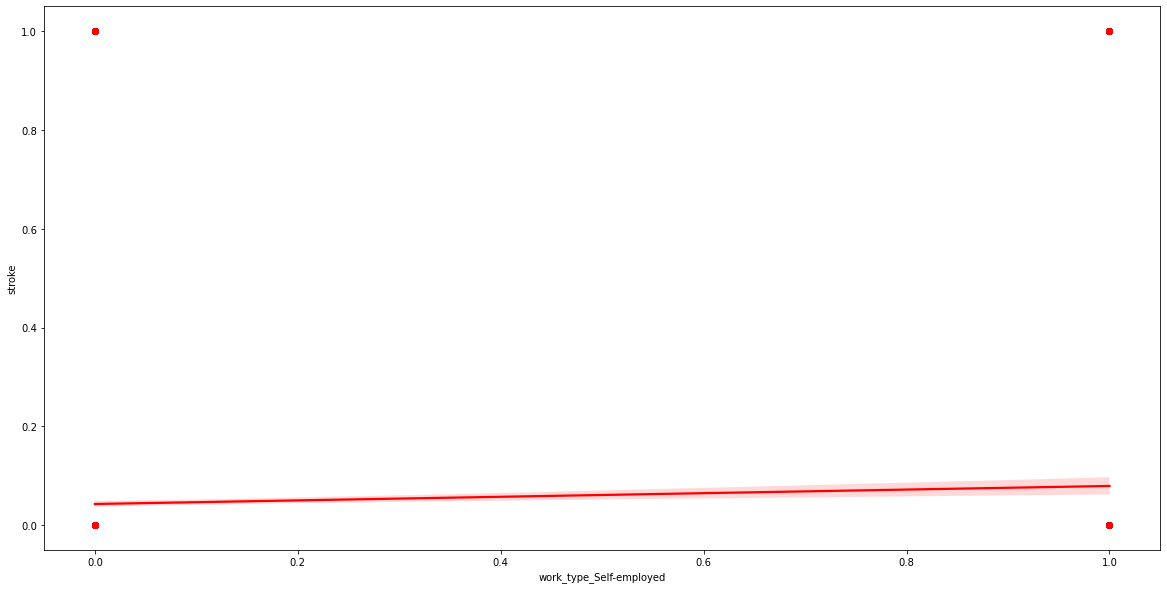

In [53]:
plt.figure(figsize = (20,10))
sns.regplot(x = df1['work_type_Self-employed'],y = df1['stroke'],color = 'red')

Observations:
    Work Type and Stroke :
Private: 5% had a stroke.

Self Employed: 8% had a stroke.

Take care of Children: 0.2% had a stroke.

Govt. Job: 5% had a stroke.

    Those who never worked never had stroke

## 6. Does average glucose level lead to stroke

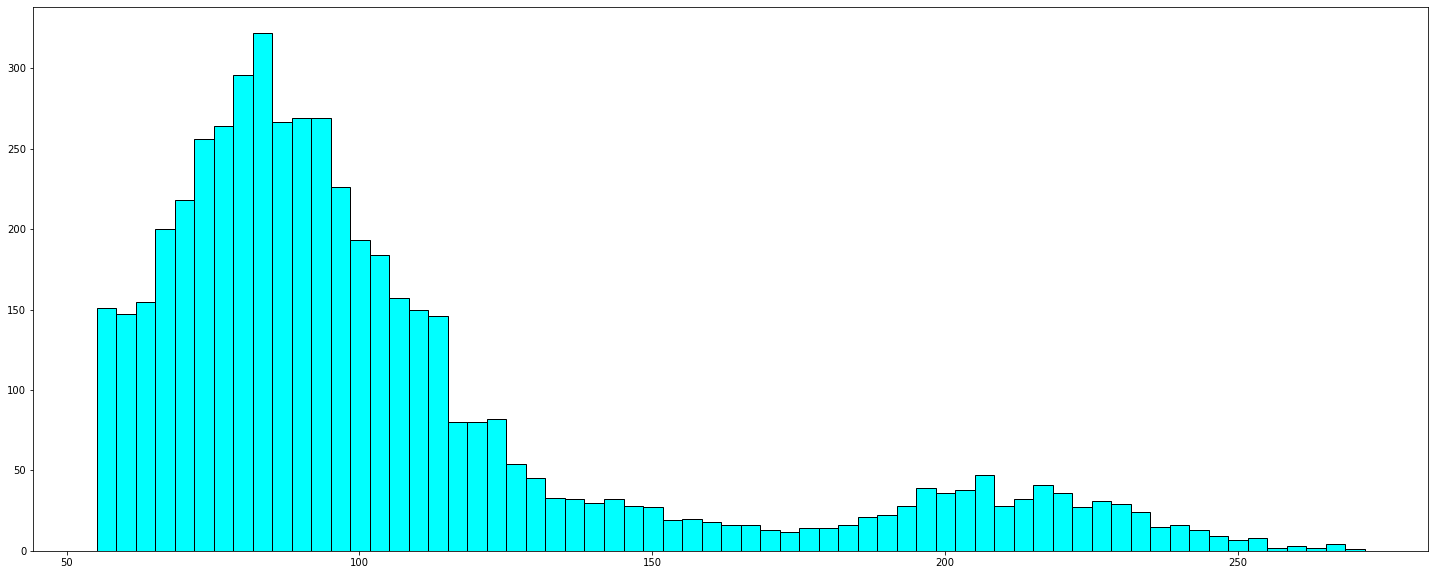

In [54]:
plt.figure(figsize=(25,10))
plt.hist(df1['avg_glucose_level'],bins = 65,edgecolor = 'black',color = 'cyan');

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


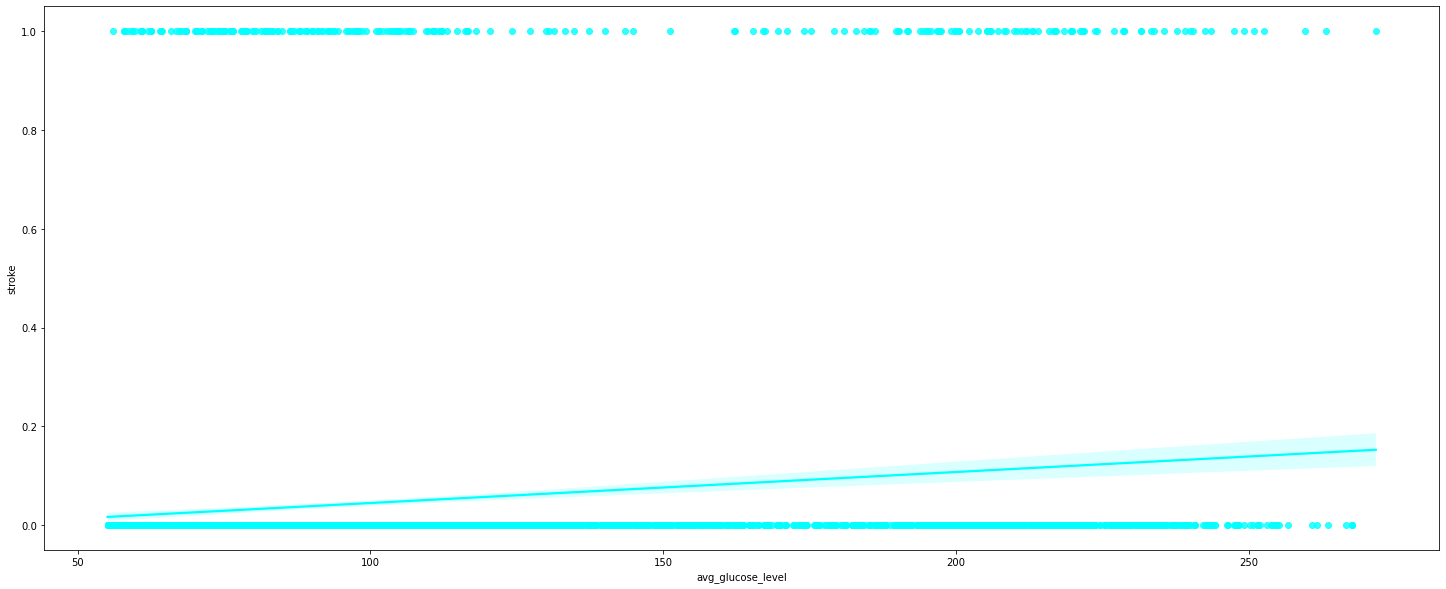

In [55]:
plt.figure(figsize = (25,10))
sns.regplot(df1['avg_glucose_level'],df1['stroke'],color = 'cyan')
plt.show()

Observation: As average_glucose_level increases the higher the chance of getting stroke

### Does BMI lead to stroke

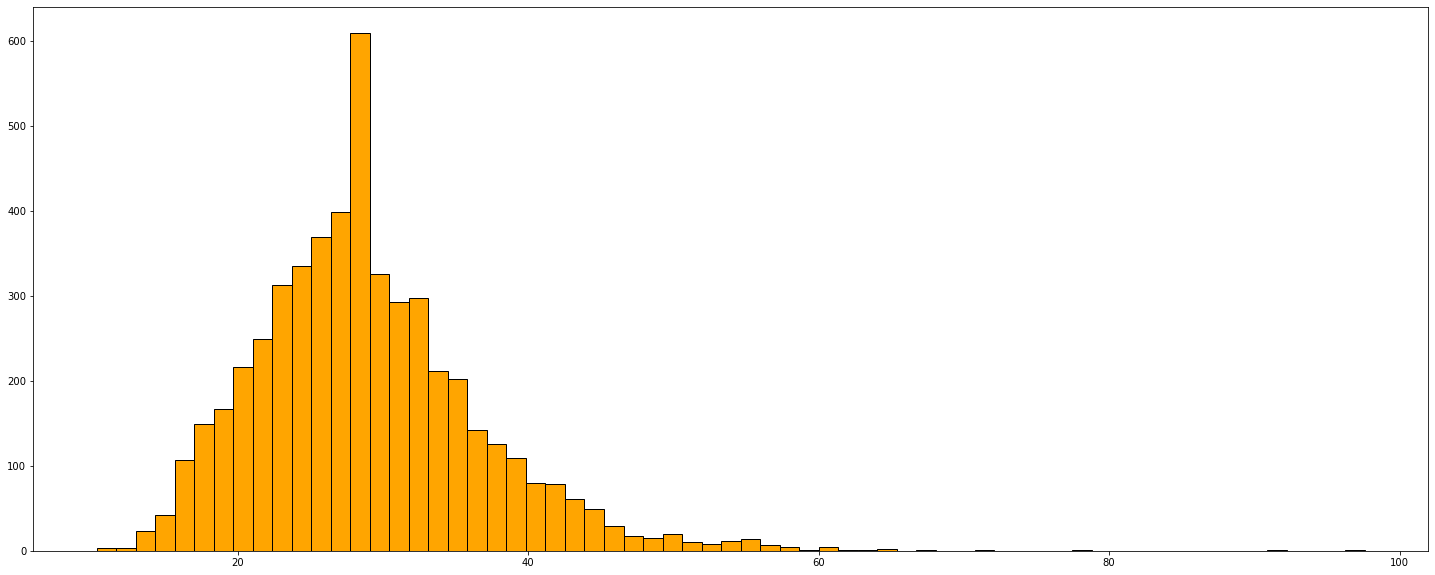

In [56]:
plt.figure(figsize=(25,10))
plt.hist(df1['bmi'],bins = 65,edgecolor = 'black',color = 'orange');

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


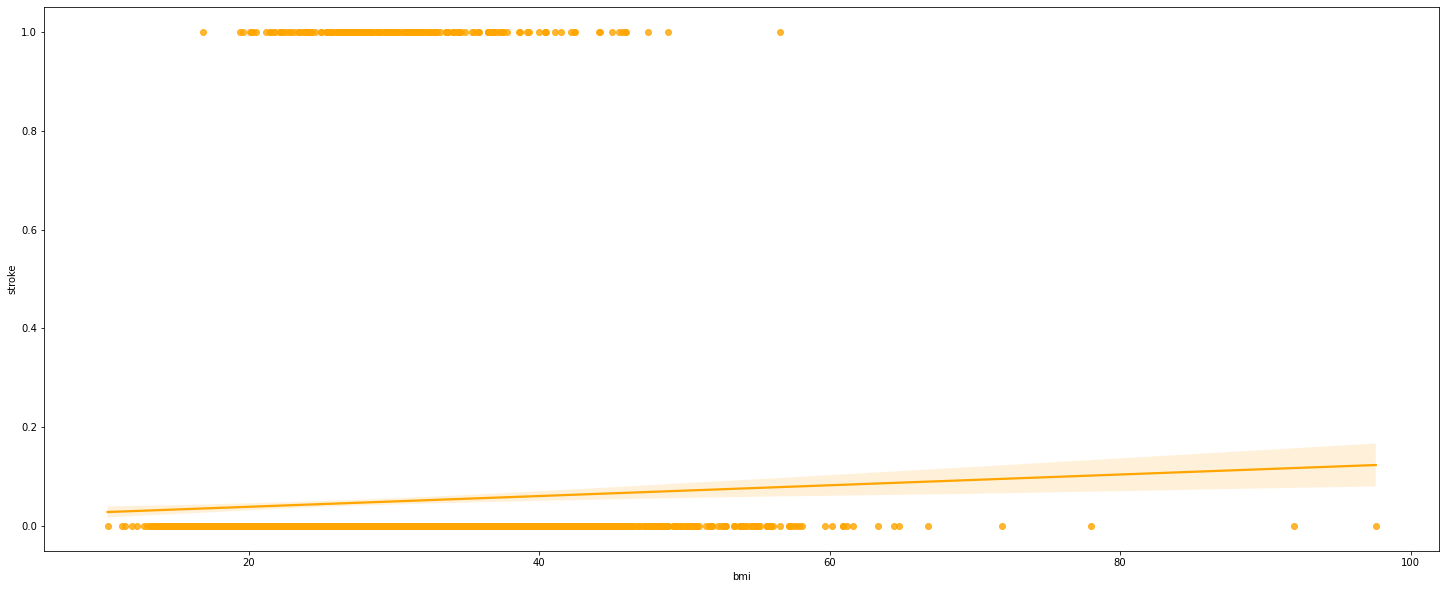

In [57]:
plt.figure(figsize = (25,10))
sns.regplot(df1['bmi'],df1['stroke'],color = 'orange')
plt.show()

Observation: As bmi increases the chances of getting stroke is high

### Does smoking status lead to stroke

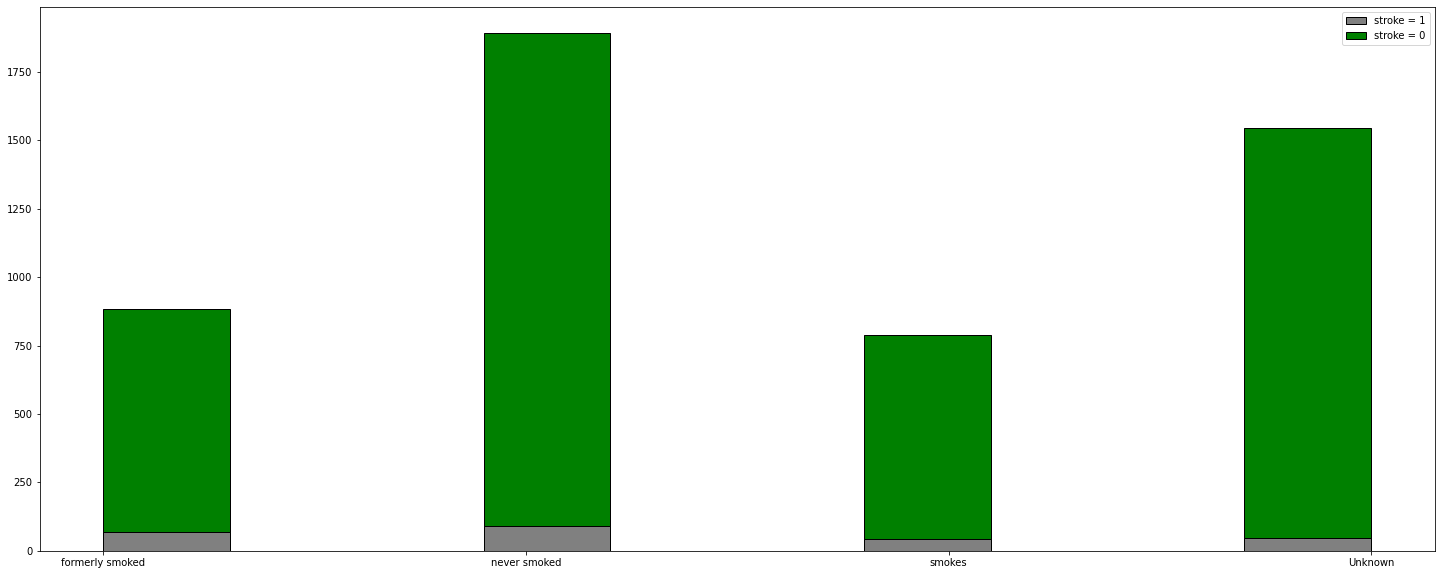

In [58]:
plt.figure(figsize = (25,10))
plt.hist(x = [df[df['stroke']==1]['smoking_status'],df[df['stroke']==0]['smoking_status']],stacked = True,edgecolor = 'black',color = ['gray','green'],label = ['stroke = 1','stroke = 0'])
plt.legend()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


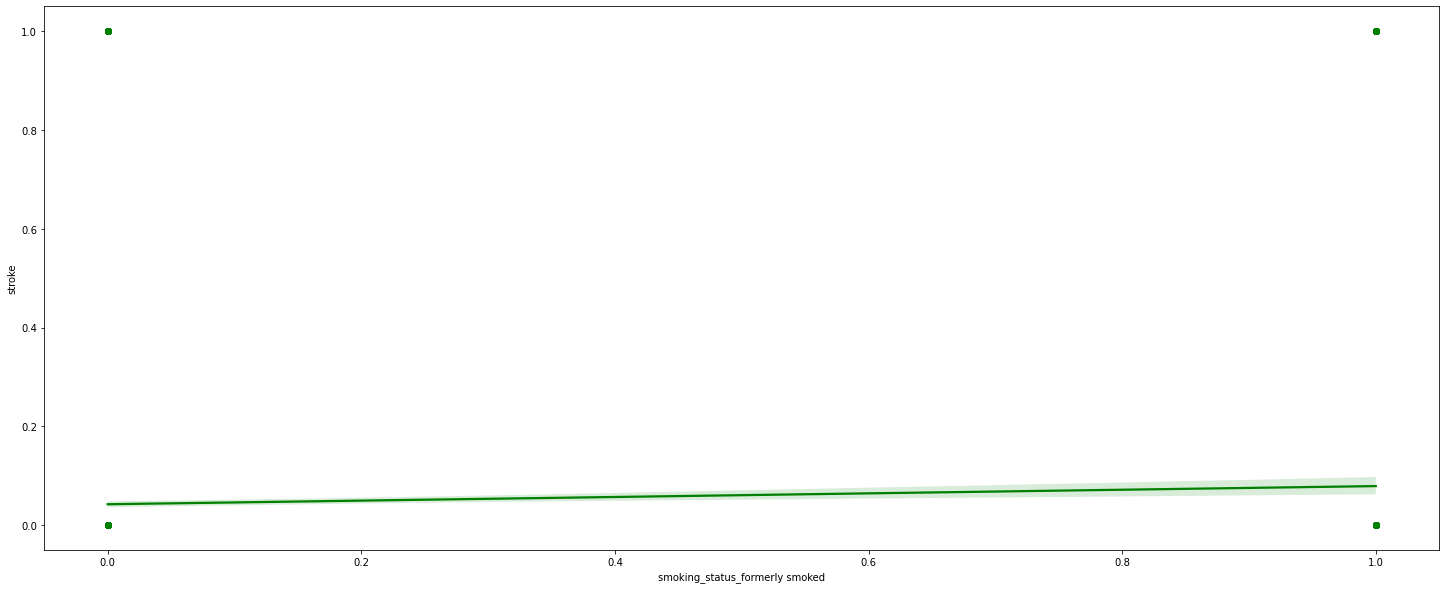

In [59]:
plt.figure(figsize = (25,10))
sns.regplot(df1['smoking_status_formerly smoked'],df1['stroke'],color = 'green')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


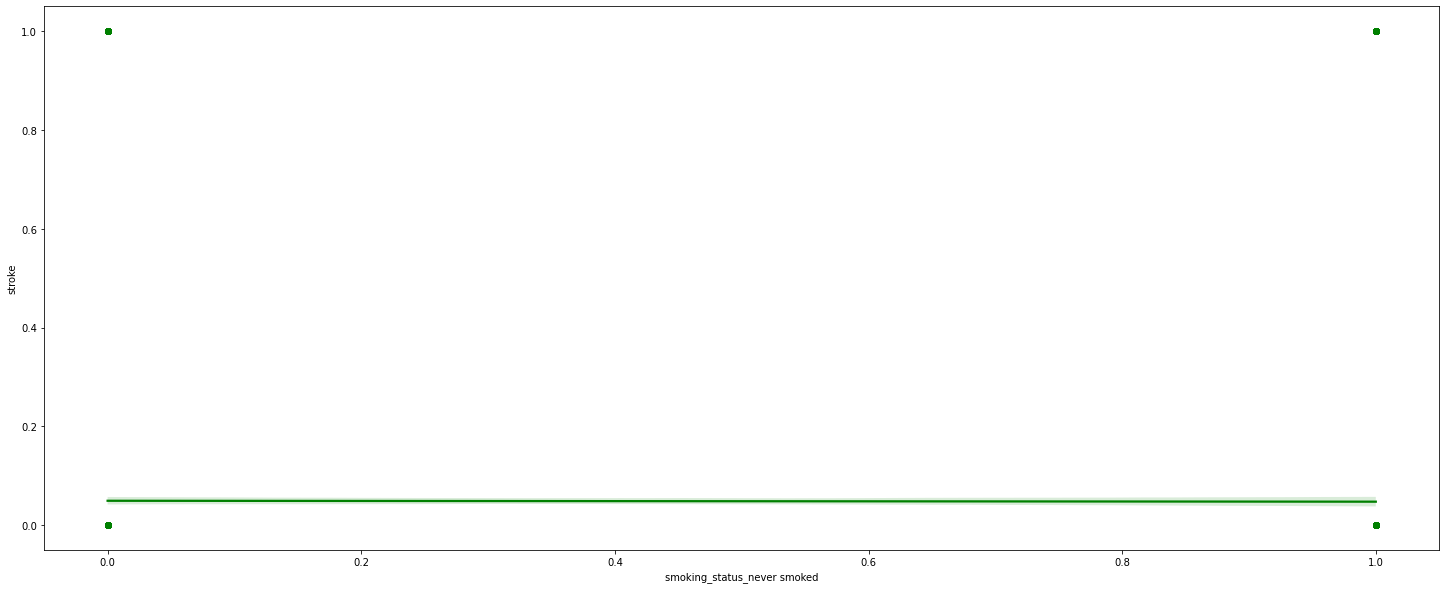

In [60]:
plt.figure(figsize = (25,10))
sns.regplot(df1['smoking_status_never smoked'],df1['stroke'],color = 'green')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


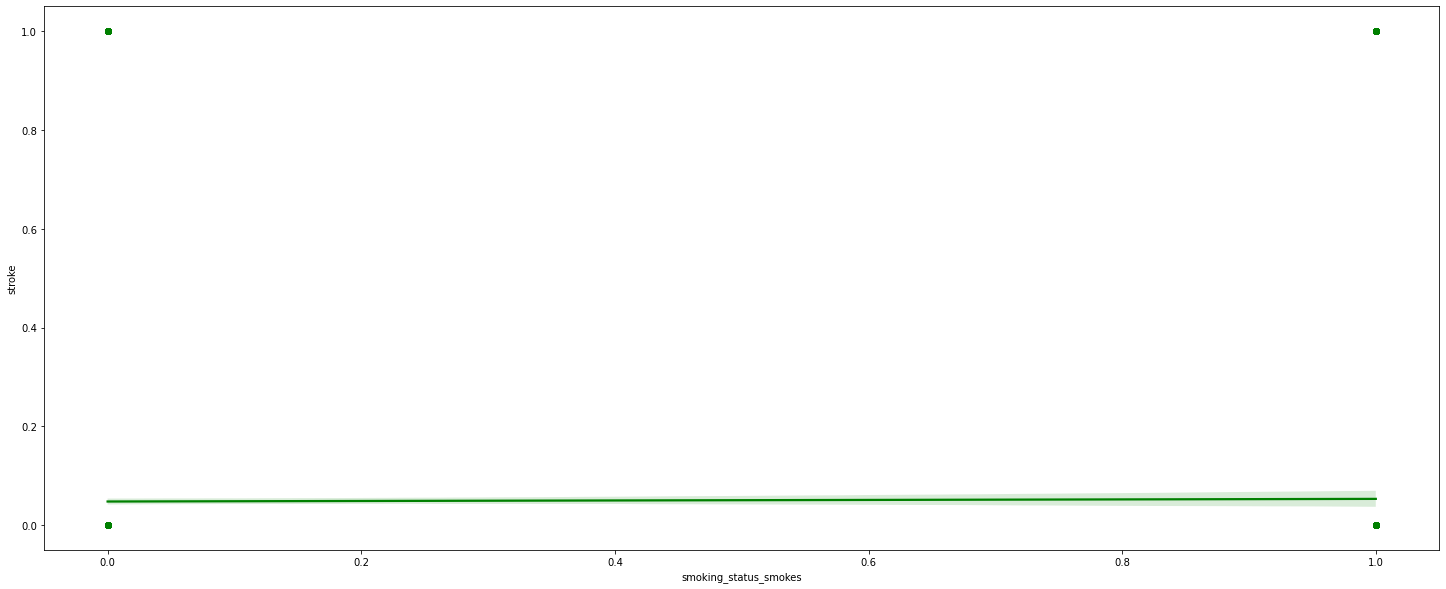

In [61]:
plt.figure(figsize = (25,10))
sns.regplot(df1['smoking_status_smokes'],df1['stroke'],color = 'green')
plt.show()

Observation: Smoking doesn't really influence an individual having stroke

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


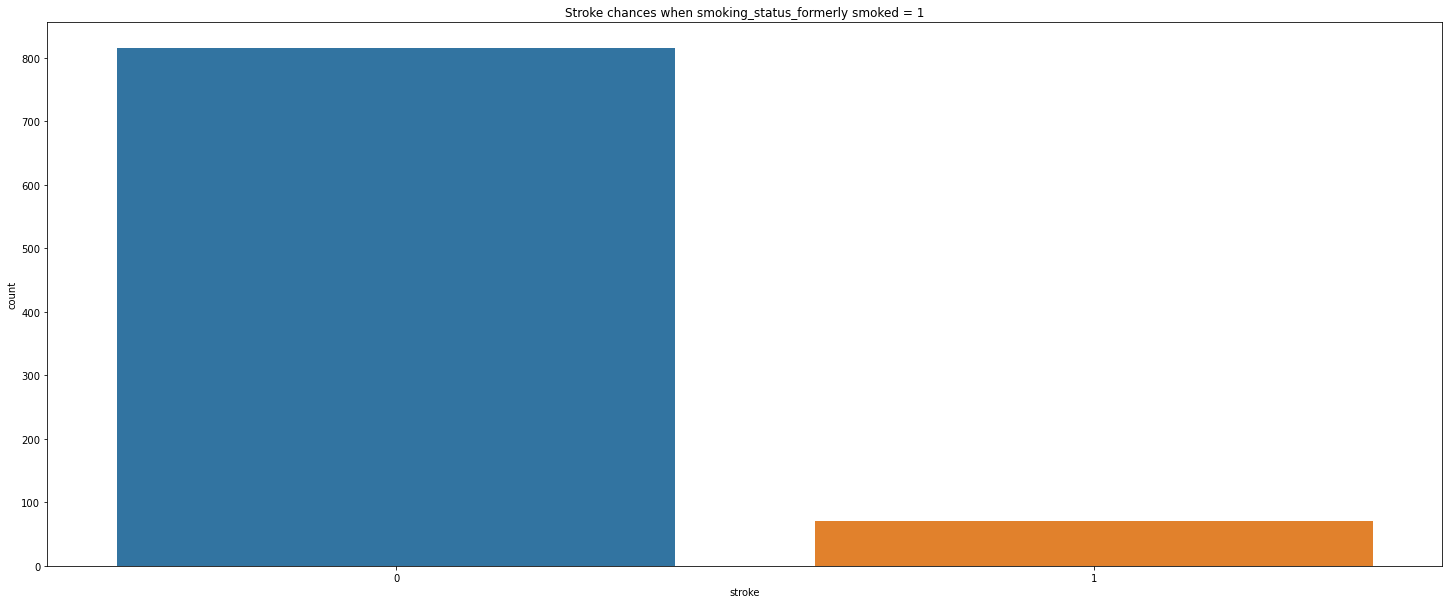

In [62]:
df_formerly_smoked_1 = df1[df1['smoking_status_formerly smoked']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_formerly_smoked_1);
plt.title("Stroke chances when smoking_status_formerly smoked = 1");

Observation: 
     8% of those who formerly smoked has stroke

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


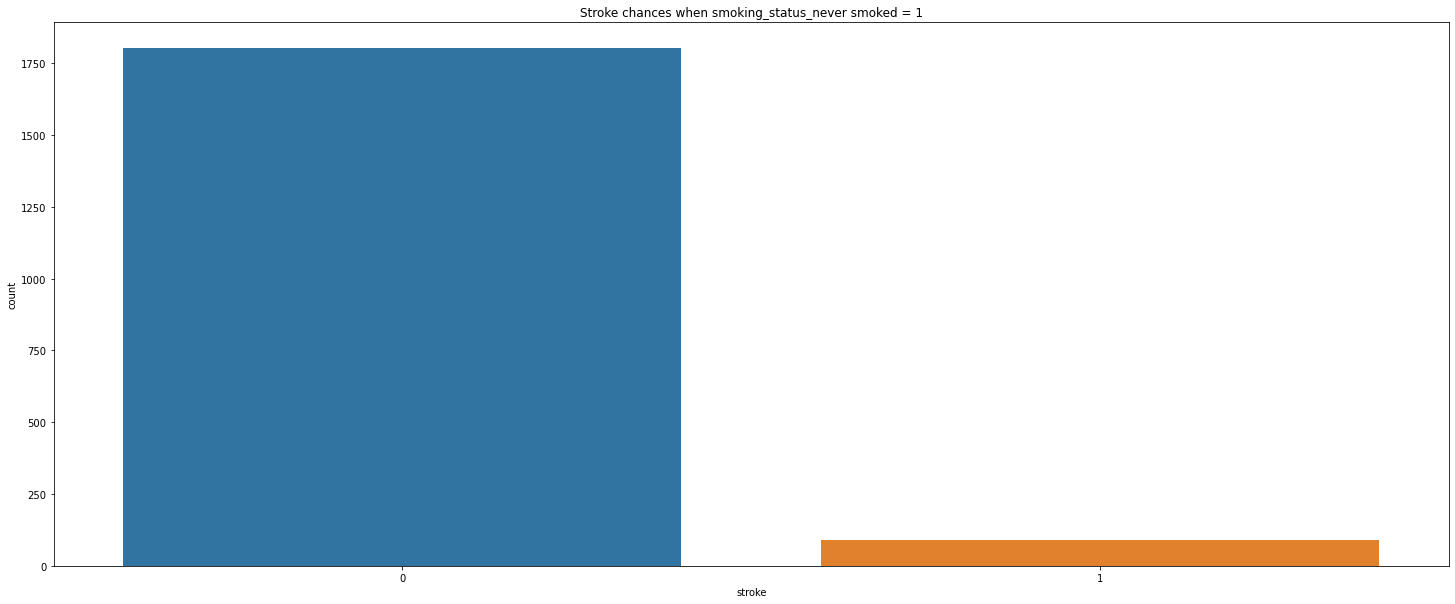

In [63]:
df_never_smoked_1 = df1[df1['smoking_status_never smoked']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_never_smoked_1);
plt.title("Stroke chances when smoking_status_never smoked = 1");

Observation: 5% of those who never smoked had stroke

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


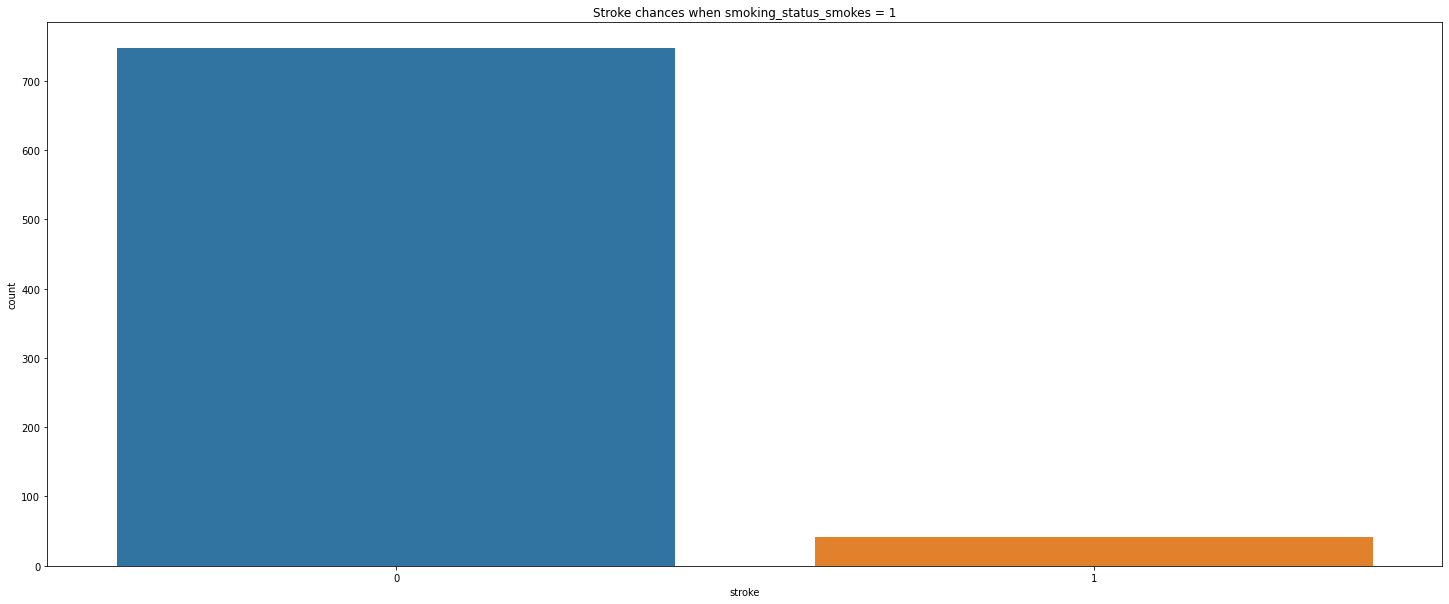

In [64]:
df_smokes_1 = df1[df1['smoking_status_smokes']==1]['stroke']
plt.figure(figsize = (25,10))
sns.countplot(df_smokes_1);
plt.title("Stroke chances when smoking_status_smokes = 1");

Observation: 5% of those who smoke had stroke.

So we can see that smoking doesn't really have an influence of having stroke

### Checking the some variables lead to stroke somehow showed us some of the important variables of our data

## checking whether the data is balanced or not and making it balanced

In [65]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

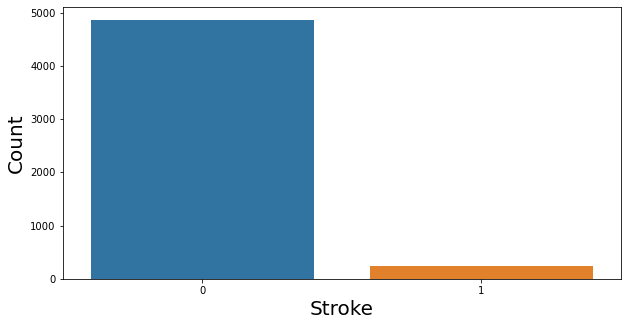

In [66]:
stroke_label = df1.stroke.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

Observation: This shows how imbalanced our data is

In [67]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df1[df1.stroke==0]

df_2 = df1[df1.stroke==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=4861,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [68]:
df_upsampled.reset_index(drop=True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.000000,0,1,0,0,0,0,0,0,0,0,0
1,58.0,1,0,87.96,39.200000,0,1,1,0,0,1,0,1,0,1,0
2,8.0,0,0,110.89,17.600000,0,0,0,0,0,1,0,1,0,0,0
3,70.0,0,0,69.04,35.900000,0,0,1,0,0,1,0,0,1,0,0
4,14.0,0,0,161.28,19.100000,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,70.0,0,1,239.07,26.100000,1,0,1,0,0,1,0,0,0,1,0
9718,82.0,0,0,86.62,29.500000,1,1,1,0,0,1,0,0,1,0,0
9719,71.0,1,0,87.80,28.893237,1,1,1,0,0,0,1,0,0,0,0
9720,51.0,1,0,88.20,28.400000,1,0,1,0,0,1,0,1,0,1,0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

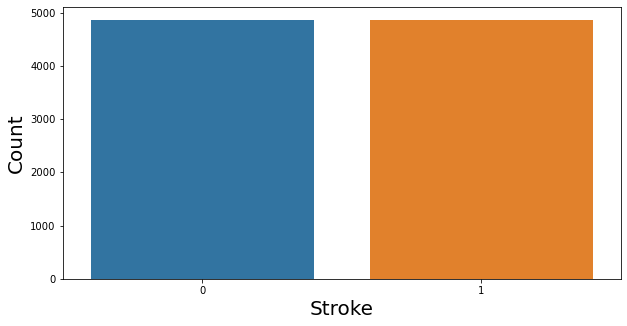

In [69]:
stroke_label = df_upsampled.stroke.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

Observation: For better prediction, we resampled the data to make it balanced

In [70]:
df_upsampled=df_upsampled.reindex(columns= ['age', 'gender_Male', 'hypertension','heart_disease','avg_glucose_level','bmi','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','Residence_type_Urban','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','stroke'])

In [71]:
df_upsampled.head()

,age,gender_Male,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
249,3.0,1,0,0,95.12,18.0,0,0,0,0,0,0,0,0,0,0
250,58.0,1,1,0,87.96,39.2,1,0,0,1,0,1,0,1,0,0
251,8.0,0,0,0,110.89,17.6,0,0,0,1,0,1,0,0,0,0
252,70.0,0,0,0,69.04,35.9,1,0,0,1,0,0,1,0,0,0
253,14.0,1,0,0,161.28,19.1,0,0,1,0,0,0,0,0,0,0


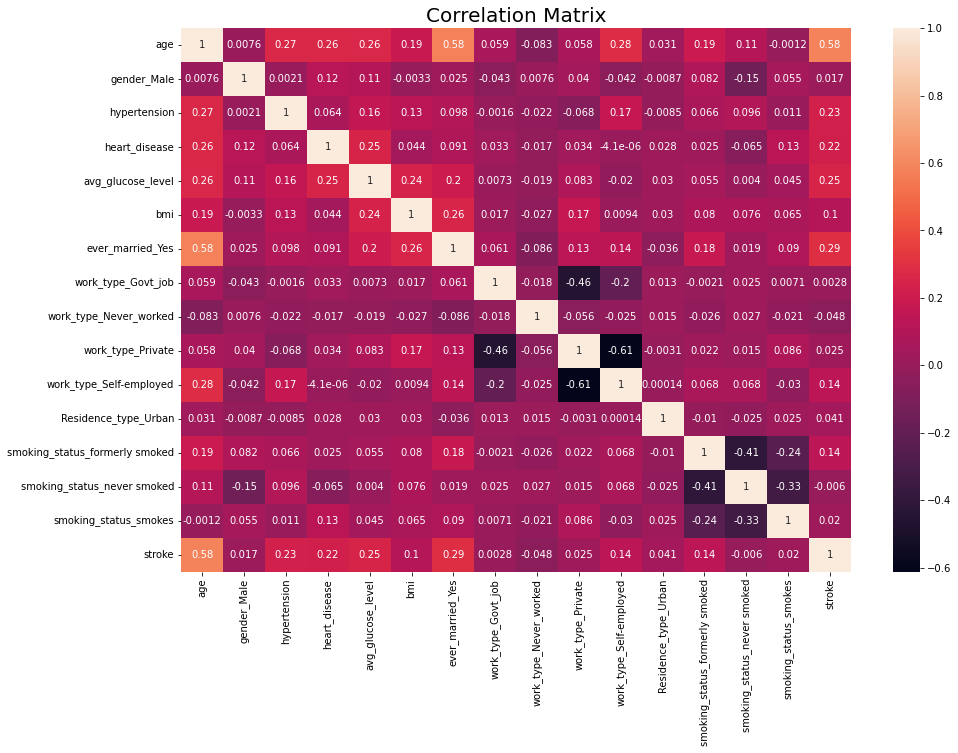

In [72]:
#checking correlation between the variables
plt.figure(figsize=(15, 10))
sns.heatmap(df_upsampled.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

Observation: age, hypertension, heart disease, average glucose level, bmi and ever_married_Yes are important features

In [73]:
#Sorting feature according to their importance
df_upsampled.corr()['stroke'].sort_values(ascending=False)[1:]

age                               0.579344
ever_married_Yes                  0.290374
avg_glucose_level                 0.245005
hypertension                      0.230082
heart_disease                     0.221108
smoking_status_formerly smoked    0.137435
work_type_Self-employed           0.136441
bmi                               0.104998
Residence_type_Urban              0.041410
work_type_Private                 0.025247
smoking_status_smokes             0.020146
gender_Male                       0.016874
work_type_Govt_job                0.002759
smoking_status_never smoked      -0.005973
work_type_Never_worked           -0.047624
Name: stroke, dtype: float64

### Outlier detection

Outlier detection method1
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | ( df[ft] > upper_bound)]
    
    return ls

### Feature selection using correlation and classification models

In [149]:
#Checking for importances of all features
df_upsampled.corr()['stroke'].sort_values(ascending=False)[1:]

age                               0.579344
ever_married_Yes                  0.290374
avg_glucose_level                 0.245005
hypertension                      0.230082
heart_disease                     0.221108
smoking_status_formerly smoked    0.137435
work_type_Self-employed           0.136441
bmi                               0.104998
Residence_type_Urban              0.041410
work_type_Private                 0.025247
smoking_status_smokes             0.020146
gender_Male                       0.016874
work_type_Govt_job                0.002759
smoking_status_never smoked      -0.005973
work_type_Never_worked           -0.047624
Name: stroke, dtype: float64

### Prediction

In [74]:
X = df_upsampled[['age', 'avg_glucose_level', 'bmi','heart_disease','hypertension','ever_married_Yes','work_type_Self-employed','smoking_status_formerly smoked']]
Y = df_upsampled['stroke']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [76]:
X_train

,age,avg_glucose_level,bmi,heart_disease,hypertension,ever_married_Yes,work_type_Self-employed,smoking_status_formerly smoked
1553,66.0,218.54,38.900000,0,0,1,0,0
141,59.0,116.44,23.800000,0,0,1,0,0
113,45.0,224.10,56.600000,0,0,1,0,0
126,78.0,93.13,28.893237,0,1,1,1,1
138,76.0,194.37,27.000000,0,1,1,1,1
...,...,...,...,...,...,...,...,...
139,75.0,199.20,26.600000,0,0,1,0,0
69,80.0,72.67,28.900000,0,1,1,1,0
1593,31.0,71.31,25.800000,0,0,1,0,0
82,79.0,88.92,22.900000,0,0,0,0,0


In [77]:
Y_train

1553    0
141     1
113     1
126     1
138     1
       ..
139     1
69      1
1593    0
82      1
1538    0
Name: stroke, Length: 7777, dtype: int64

In [78]:
X_test

,age,avg_glucose_level,bmi,heart_disease,hypertension,ever_married_Yes,work_type_Self-employed,smoking_status_formerly smoked
2416,47.0,86.99,28.900000,0,0,1,0,0
200,74.0,167.13,28.893237,0,0,1,0,0
3039,25.0,89.87,26.500000,0,0,1,0,0
1982,25.0,75.50,24.600000,0,0,0,0,0
2567,48.0,57.43,53.500000,0,0,1,0,1
...,...,...,...,...,...,...,...,...
2760,24.0,73.49,23.500000,0,0,0,0,0
1551,42.0,83.14,23.700000,0,0,1,0,0
73,63.0,228.56,27.400000,0,0,1,0,0
4055,68.0,96.14,26.700000,1,0,1,0,0


In [79]:
Y_test

2416    0
200     1
3039    0
1982    0
2567    0
       ..
2760    0
1551    0
73      1
4055    0
4025    0
Name: stroke, Length: 1945, dtype: int64

In [80]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [81]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [82]:
X_train_std

array([[ 0.49401059,  1.80978614,  1.33893412, ...,  0.54758522,
        -0.5167447 , -0.54341801],
       [ 0.17795329, -0.03767388, -0.83444109, ...,  0.54758522,
        -0.5167447 , -0.54341801],
       [-0.45416133,  1.91039219,  3.88653287, ...,  0.54758522,
        -0.5167447 , -0.54341801],
       ...,
       [-1.08627594, -0.85428378, -0.54657682, ...,  0.54758522,
        -0.5167447 , -0.54341801],
       [ 1.08097416, -0.53563764, -0.96398001, ..., -1.82619976,
        -0.5167447 , -0.54341801],
       [-0.04780193, -0.74191623,  0.89274451, ...,  0.54758522,
         1.93519158, -0.54341801]])

In [83]:
X_test_std

array([[-0.36385924, -0.57056025, -0.10038721, ...,  0.54758522,
        -0.5167447 , -0.54341801],
       [ 0.85521894,  0.87954207, -0.10136064, ...,  0.54758522,
        -0.5167447 , -0.54341801],
       [-1.3571822 , -0.51844776, -0.44582433, ...,  0.54758522,
        -0.5167447 , -0.54341801],
       ...,
       [ 0.35855746,  1.99109417, -0.31628541, ...,  0.54758522,
        -0.5167447 , -0.54341801],
       [ 0.58431268, -0.40499453, -0.4170379 , ...,  0.54758522,
        -0.5167447 , -0.54341801],
       [-2.26020307, -0.25281884, -1.91393209, ..., -1.82619976,
        -0.5167447 , -0.54341801]])

## Training

### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [85]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [86]:
Y_pred_lr=lr.predict(X_test_std)

In [87]:
Y_pred_lr

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [89]:
from sklearn.metrics import confusion_matrix

In [94]:
##calculating the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)

In [95]:
conf_matrix

array([[733, 262],
       [181, 769]], dtype=int64)

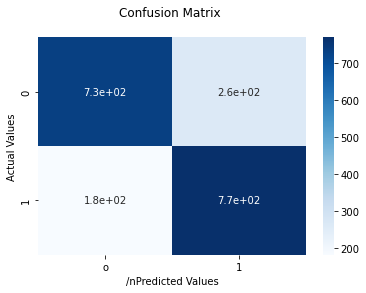

In [96]:
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix \n')
ax.set_xlabel('/nPredicted Values')
ax.set_ylabel('Actual Values')
##ticket labels - list must be in alphabetical order
ax.xaxis.set_ticklabels(['o','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [99]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [100]:
ac_lr

0.7722365038560411

In [103]:
pc_lr=precision_score(Y_test,Y_pred_lr)

In [104]:
pc_lr

0.7458777885548011

In [105]:
rc_lr=recall_score(Y_test,Y_pred_lr)

In [106]:
rc_lr

0.8094736842105263

In [107]:
f_lr=f1_score(Y_test,Y_pred_lr)

In [108]:
f_lr

0.7763755678950025

Initially the logistic regression was chosen to be our main algorithm for prediction but we weren't very impressed with the accuracy score so we decided to choose other algorithms for predictions below

### KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [110]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [111]:
Y_pred_knn=knn.predict(X_test_std)

In [112]:
Y_pred_knn

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [113]:
##calculating the confusion matrix
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)

In [114]:
conf_matrix_knn

array([[844, 151],
       [  0, 950]], dtype=int64)

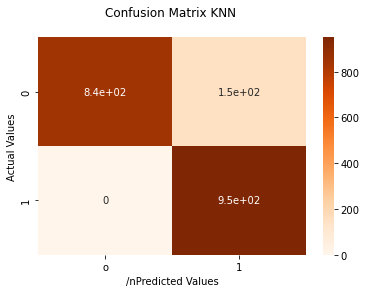

In [115]:
ax = sns.heatmap(conf_matrix_knn, annot=True, cmap='Oranges')
ax.set_title('Confusion Matrix KNN \n')
ax.set_xlabel('/nPredicted Values')
ax.set_ylabel('Actual Values')

##ticket labels - list must be in alphabetical order
ax.xaxis.set_ticklabels(['o','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [117]:
ac_knn=accuracy_score(Y_test,Y_pred_knn)

In [118]:
ac_knn

0.9223650385604113

In [119]:
pc_knn=precision_score(Y_test,Y_pred_knn)

In [120]:
pc_knn

0.8628519527702089

In [121]:
rc_knn=recall_score(Y_test,Y_pred_knn)

In [122]:
rc_knn

1.0

In [123]:
f_knn=f1_score(Y_test,Y_pred_knn)

In [124]:
f_knn

0.9263773768893222

### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [126]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [128]:
Y_pred_rf=rf.predict(X_test_std)

In [129]:
Y_pred_rf

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [130]:
##calculating the confusion matrix
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

In [131]:
conf_matrix_rf

array([[967,  28],
       [  0, 950]], dtype=int64)

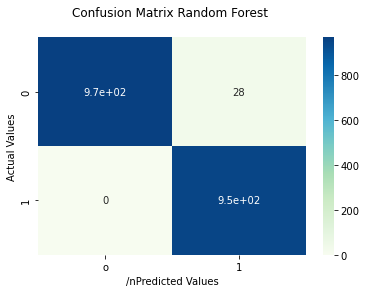

In [134]:
ax = sns.heatmap(conf_matrix_rf, annot=True, cmap='GnBu')
ax.set_title('Confusion Matrix Random Forest \n')
ax.set_xlabel('/nPredicted Values')
ax.set_ylabel('Actual Values')

##ticket labels - list must be in alphabetical order
ax.xaxis.set_ticklabels(['o','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [135]:
ac_rf=accuracy_score(Y_test,Y_pred_rf)

In [136]:
ac_rf

0.9856041131105399

In [137]:
pc_rf=precision_score(Y_test,Y_pred_rf)

In [138]:
pc_rf

0.9713701431492843

In [139]:
rc_rf=recall_score(Y_test,Y_pred_rf)

In [140]:
rc_rf

1.0

In [141]:
f_rf=f1_score(Y_test,Y_pred_rf)

In [142]:
f_rf

0.9854771784232366

### SVM

In [143]:
from sklearn.svm import SVC

In [144]:
sv=SVC()

In [145]:
sv.fit(X_train_std,Y_train)

SVC()

In [146]:
Y_pred_svm=sv.predict(X_test_std)

In [147]:
Y_pred_svm

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [148]:
#calculating the confusion matrix
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)

In [149]:
conf_matrix_svm

array([[763, 232],
       [154, 796]], dtype=int64)

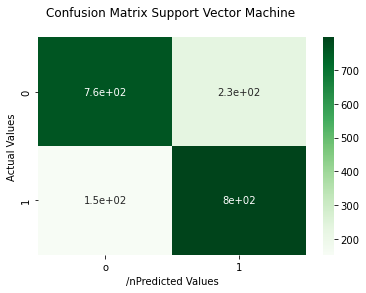

In [150]:
ax = sns.heatmap(conf_matrix_svm, annot=True, cmap='Greens')
ax.set_title('Confusion Matrix Support Vector Machine \n')
ax.set_xlabel('/nPredicted Values')
ax.set_ylabel('Actual Values')

##ticket labels - list must be in alphabetical order
ax.xaxis.set_ticklabels(['o','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [151]:
ac_svm=accuracy_score(Y_test,Y_pred_svm)

In [152]:
ac_svm

0.8015424164524422

In [153]:
pc_svm=precision_score(Y_test, Y_pred_svm)

In [154]:
pc_svm

0.77431906614786

In [155]:
rc_svm=recall_score(Y_test,Y_pred_svm)

In [156]:
rc_svm

0.8378947368421052

In [157]:
f_svm=f1_score(Y_test,Y_pred_svm)

In [158]:
f_svm

0.8048533872598584

## Plotting bar plots for the accuracy, precision, recall, and f1 scores for all the models

In [159]:
c = ['red', 'yellow', 'blue', 'orange']

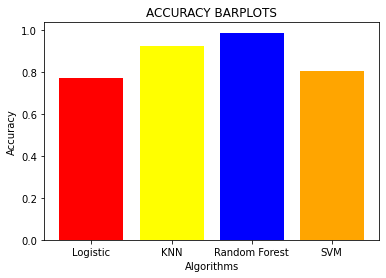

In [160]:
plt.bar(['Logistic','KNN','Random Forest','SVM'],[ac_lr,ac_knn,ac_rf,ac_svm],color = c) 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title('ACCURACY SCORE BARPLOTS')
plt.show()

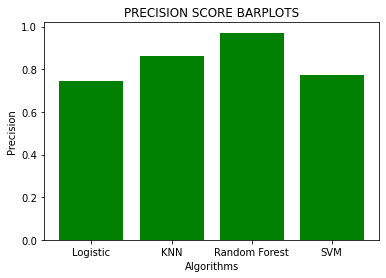

In [169]:
plt.bar(['Logistic','KNN','Random Forest','SVM'],[pc_lr,pc_knn,pc_rf,pc_svm],color = 'green') 
plt.xlabel("Algorithms")
plt.ylabel("Precision")
plt.title('PRECISION SCORE BARPLOTS')
plt.show()

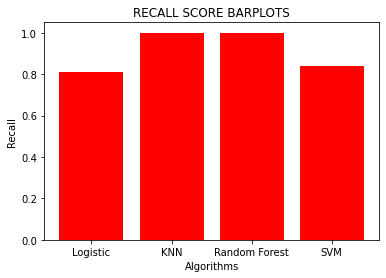

In [170]:
plt.bar(['Logistic','KNN','Random Forest','SVM'],[rc_lr,rc_knn,rc_rf,rc_svm],color = 'red') 
plt.xlabel("Algorithms")
plt.ylabel("Recall")
plt.title('RECALL SCORE BARPLOTS')
plt.show()

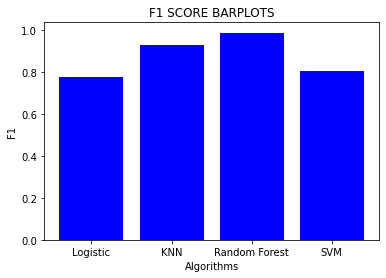

In [171]:
plt.bar(['Logistic','KNN','Random Forest','SVM'],[f_lr,f_knn,f_rf,f_svm],color = 'blue') 
plt.xlabel("Algorithms")
plt.ylabel("F1")
plt.title('F1 SCORE BARPLOTS')
plt.show()